# THE ELK STACK

The ELK Stack is short for Elasticsearch, Logstash and Kibana Stack. 

The ELK Stack is a collection of three open-source products of the company, Elastic — Elasticsearch, Logstash and Kibana. Elasticsearch is a NoSQL database that is based on the Lucene search engine. Logstash is a log pipeline tool that accepts inputs from various sources, executes different transformations, and exports the data to various targets. Kibana is a visualization layer that works on top of Elasticsearch.[1]

The ELK Stack is being used to some extent in business intelligence, web analytics and security and compliance. However, these three products are most commonly used in log analysis in IT environments. Logstash collects and parses logs, and then Elasticsearch indexes and stores the information in way that its convenient to query. Kibana then presents the data in visualizations that provide actionable insights into one’s environment.[1]

### Elasticsearch

Elasticsearch is a log search tool that aids data extraction issues. It helps save man hours and manpower assigned to extracting any data for business decisions. Now lets talk about the benefits of using elasticsearch. Real-time data insights with super-fast powerful data extractions from structured or unstructured data sources can be obtained using Elasticsearch. As your organization grows bigger, you can scale easily with Elasticsearch. The scaling is horizontal. As and when you need a new node, it can be added to the cluster and it automatically reorganize itself to use the new node's hardware. Elasticsearch clusters automatically detect and remove node failures. Elasticsearch supports multi-tenancy.

Moreover, Elasticsearch provides a powerful full-text search capability using Lucene. It support multiple languages, auto text completion and geolocation. Real-world data can be stored in structured JSON documents in Elasticsearch and they are stored with default indices. They can be retrieved quickly and accurately using their respective indices.


### Logstash

Logstash is a tool used for processing and routing log data like system logs, webserver logs, error logs, and app logs. Normalizing data from different data sources is a lot of work. For example, Apache logs differ from NGINX logs. So instead of using ETL (Extract, Transform and Load) to normalize, using Logstash to normalize with Elasticsearch to process the data and Kibana to visualize it can be a much faster alternative. 

Logtsash stores all the logs in a central location. Logstash performs storage, querying and analysis of your logs. For this purpose it just needs the support of Elasticsearch as a backend datastore and Kibana as a frontend dashboard. Logstash has mounds of ready-made inputs, filters, codecs, and outputs which help it perform all the cumbersome logs-related tasks thereby reducing the load on the user. In a nutshell, Logtsash takes a small amount of time to choose the inputs, configure its filters and extract high-valued information from logs. After that, once this data is made available to Elasticsearch, queries can be fired against this information at lightening fast speeds.


### Kibana

Kibana is your used for visualizing your log-data thus its like a logs dashboard. Visualization of large datatores of logs can be in the form of point-and-click pie charts, bar graphs, trendlines, maps and scatter plots. It enables you to visualize trends and patterns for data that would otherwise be very tiresome to read and interpret. 

Kibana also has a dashboard option so different departments in a company can keep visuaizations of logs important to them on their respective dashboards. Its quite easy to operate. Several views, including rolling average, count, sum etc are available.


### Setup Procedure

The ELK Stack can be installed and used locally on your system but in the real world companies use AWS or a similar service to use it because your local system may not have the computation power needed to do this kind of analysis at the scale that the comapny needs. After making an account on www.aws.amazon.com follow the steps given below. Ignore the step numbers mentioned in the images. They indicate the step numbers within that section of setup. Make sure you have Java Runtime Environment (JRE) preinstalled in your system as Logstash needs that.

##### Part 1: Basic Setup of AWS for ELK stack

Step 1: Import IPython library to load images.

In [ ]:
from IPython.display import Image

Step 2: Select an Amazon Linux AMI instance on AWS.

In [38]:
Image(url="../Desktop/image1.png") 

Step 3: Choose t2.micro instance as the computation for the purpose of this tutorial will be very less so this speed should suffice. Then press Next.

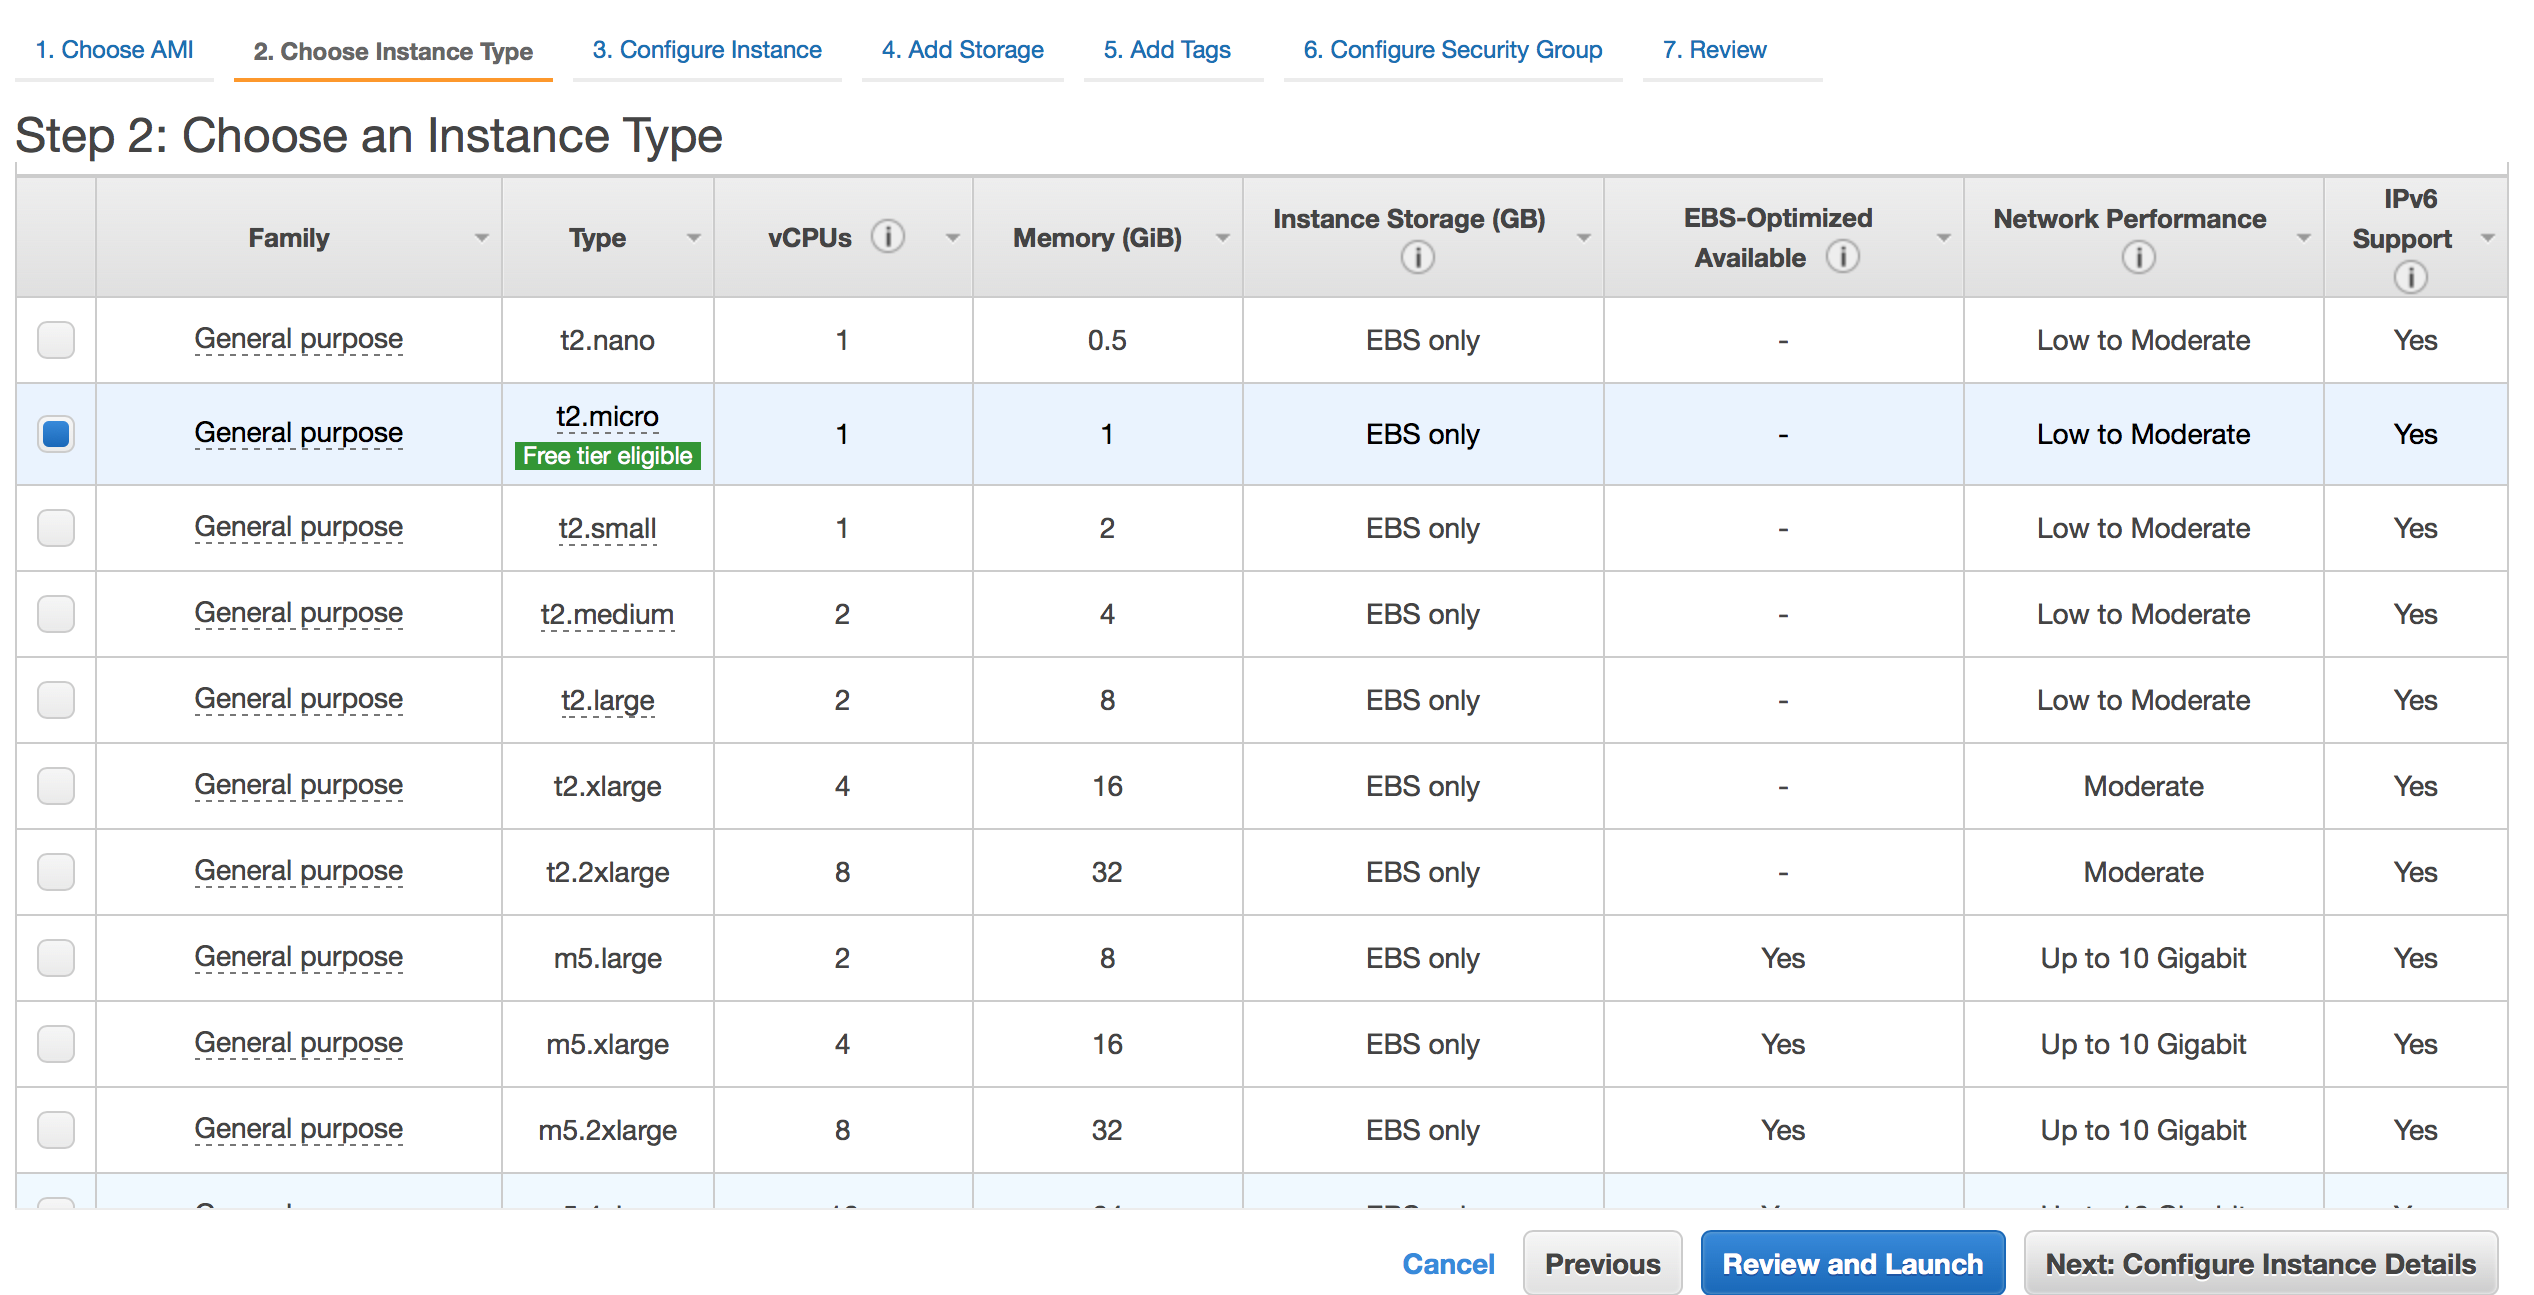

In [39]:
Image(filename="../Desktop/image2.png") 

Step 4: Choose to have atleast 3 instances - on each of Elastic Search, Logstash and Kibana. Here I've chosen 4 as I have made 2 instances of Elastic Search to balance the load but this is not necessary.

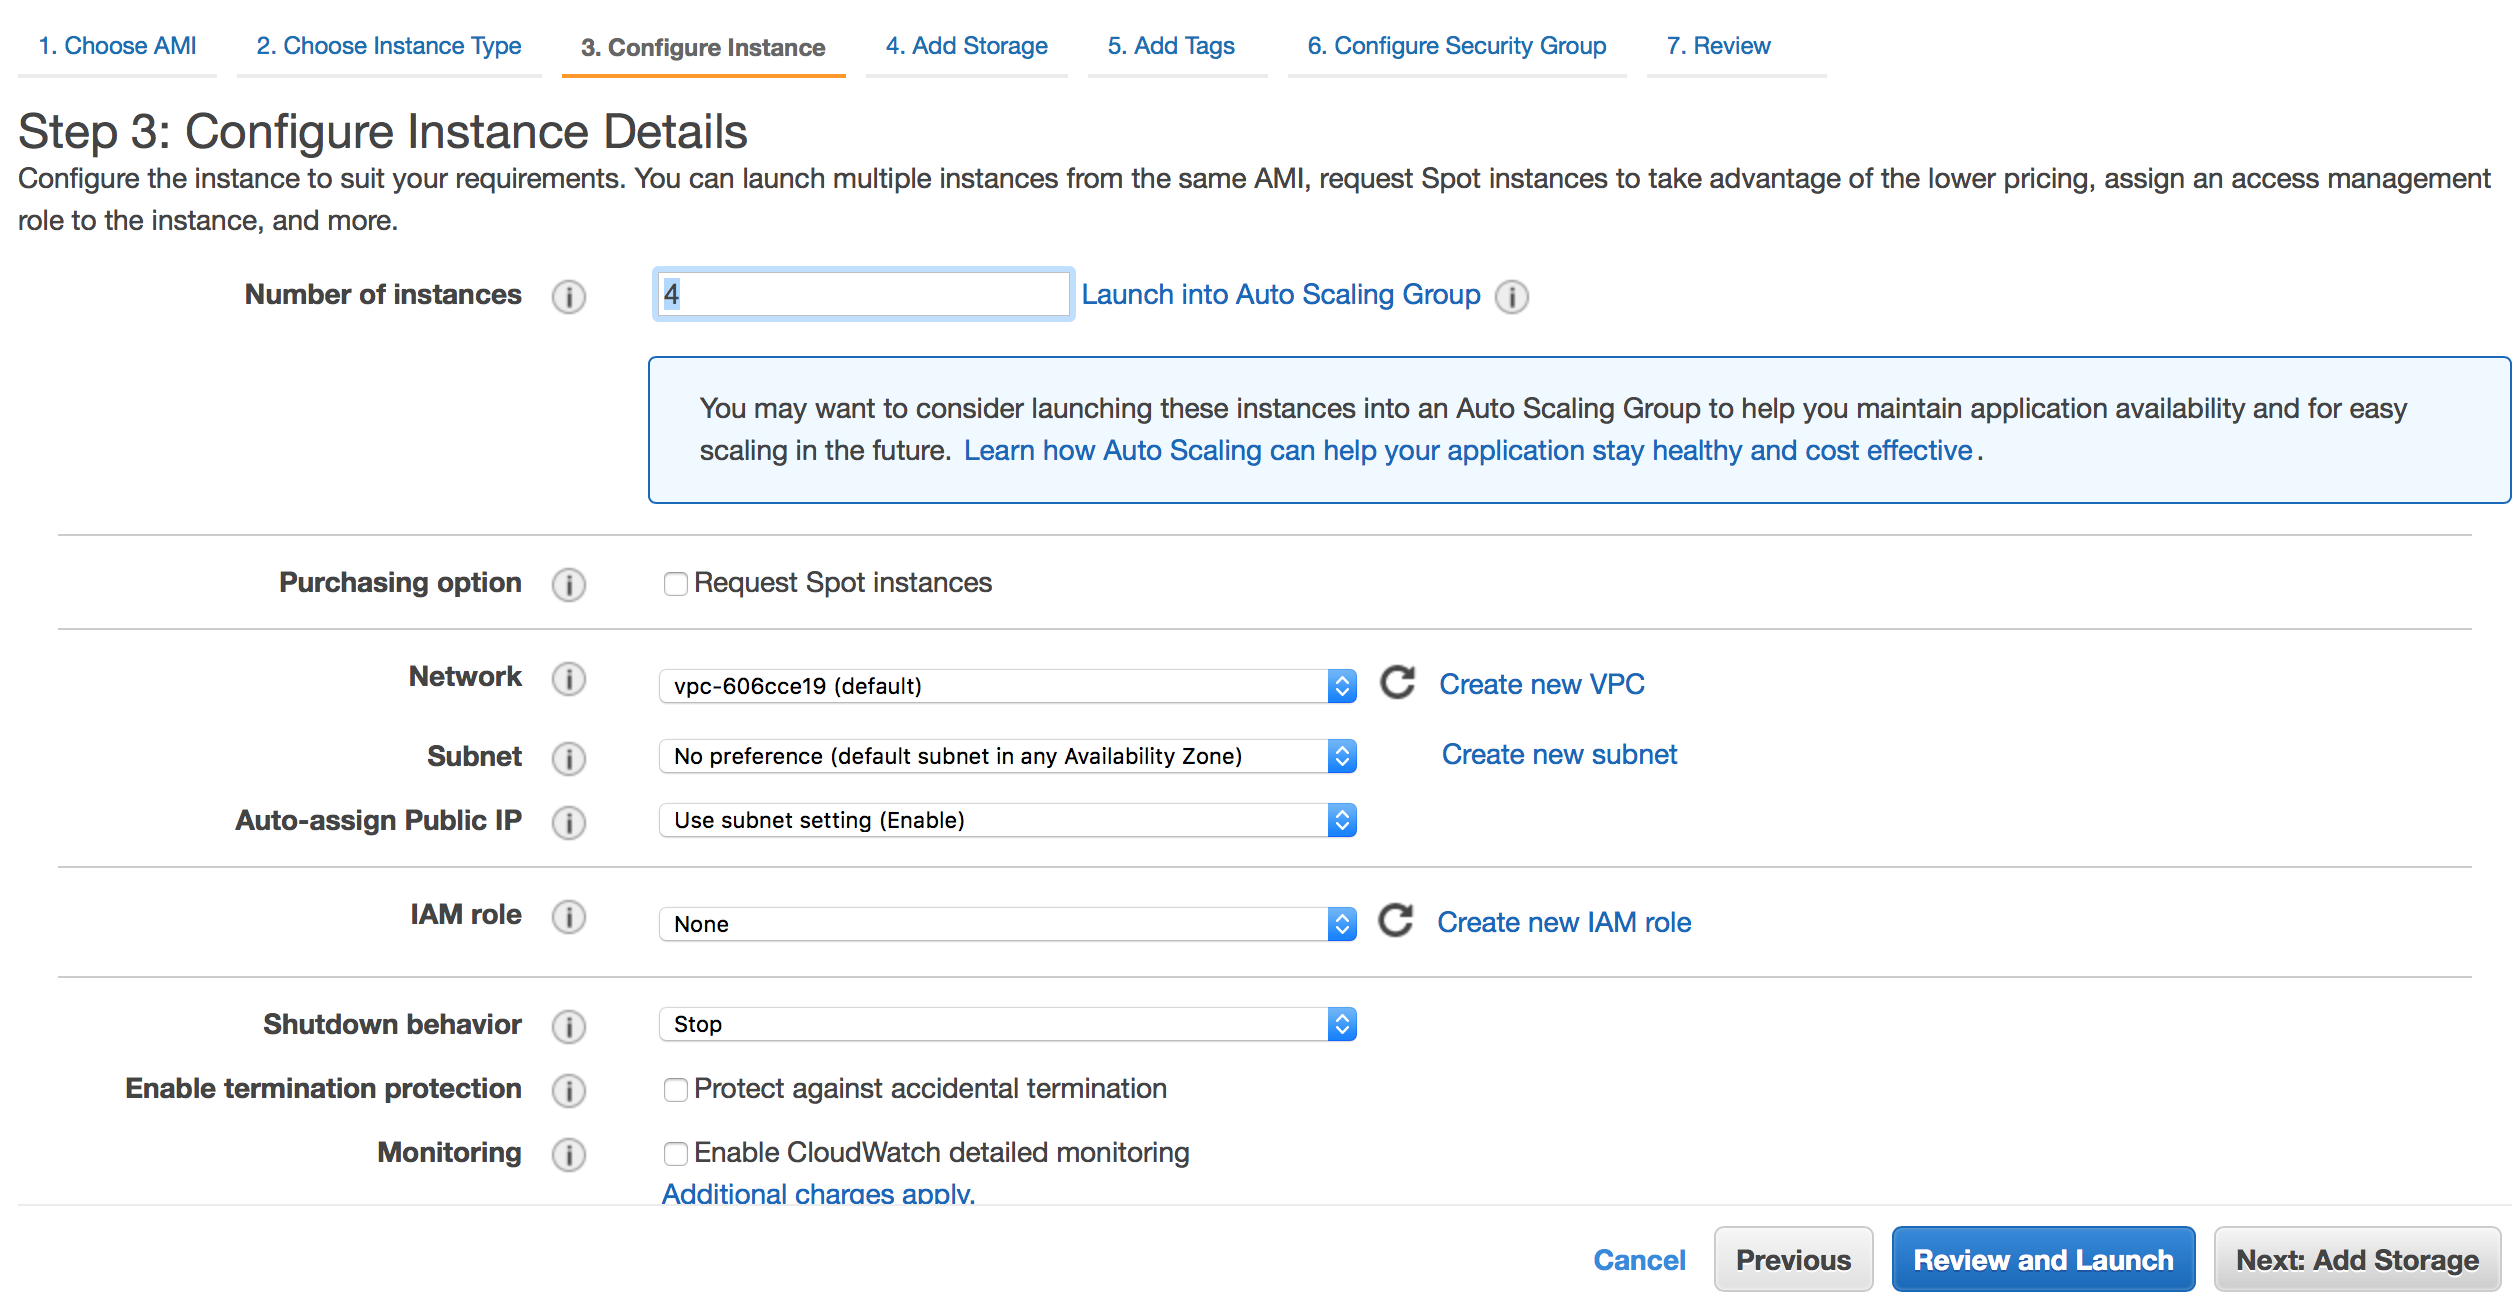

In [40]:
Image(filename="../Desktop/i3.png") 

Step 5: Assign a size to your volume.

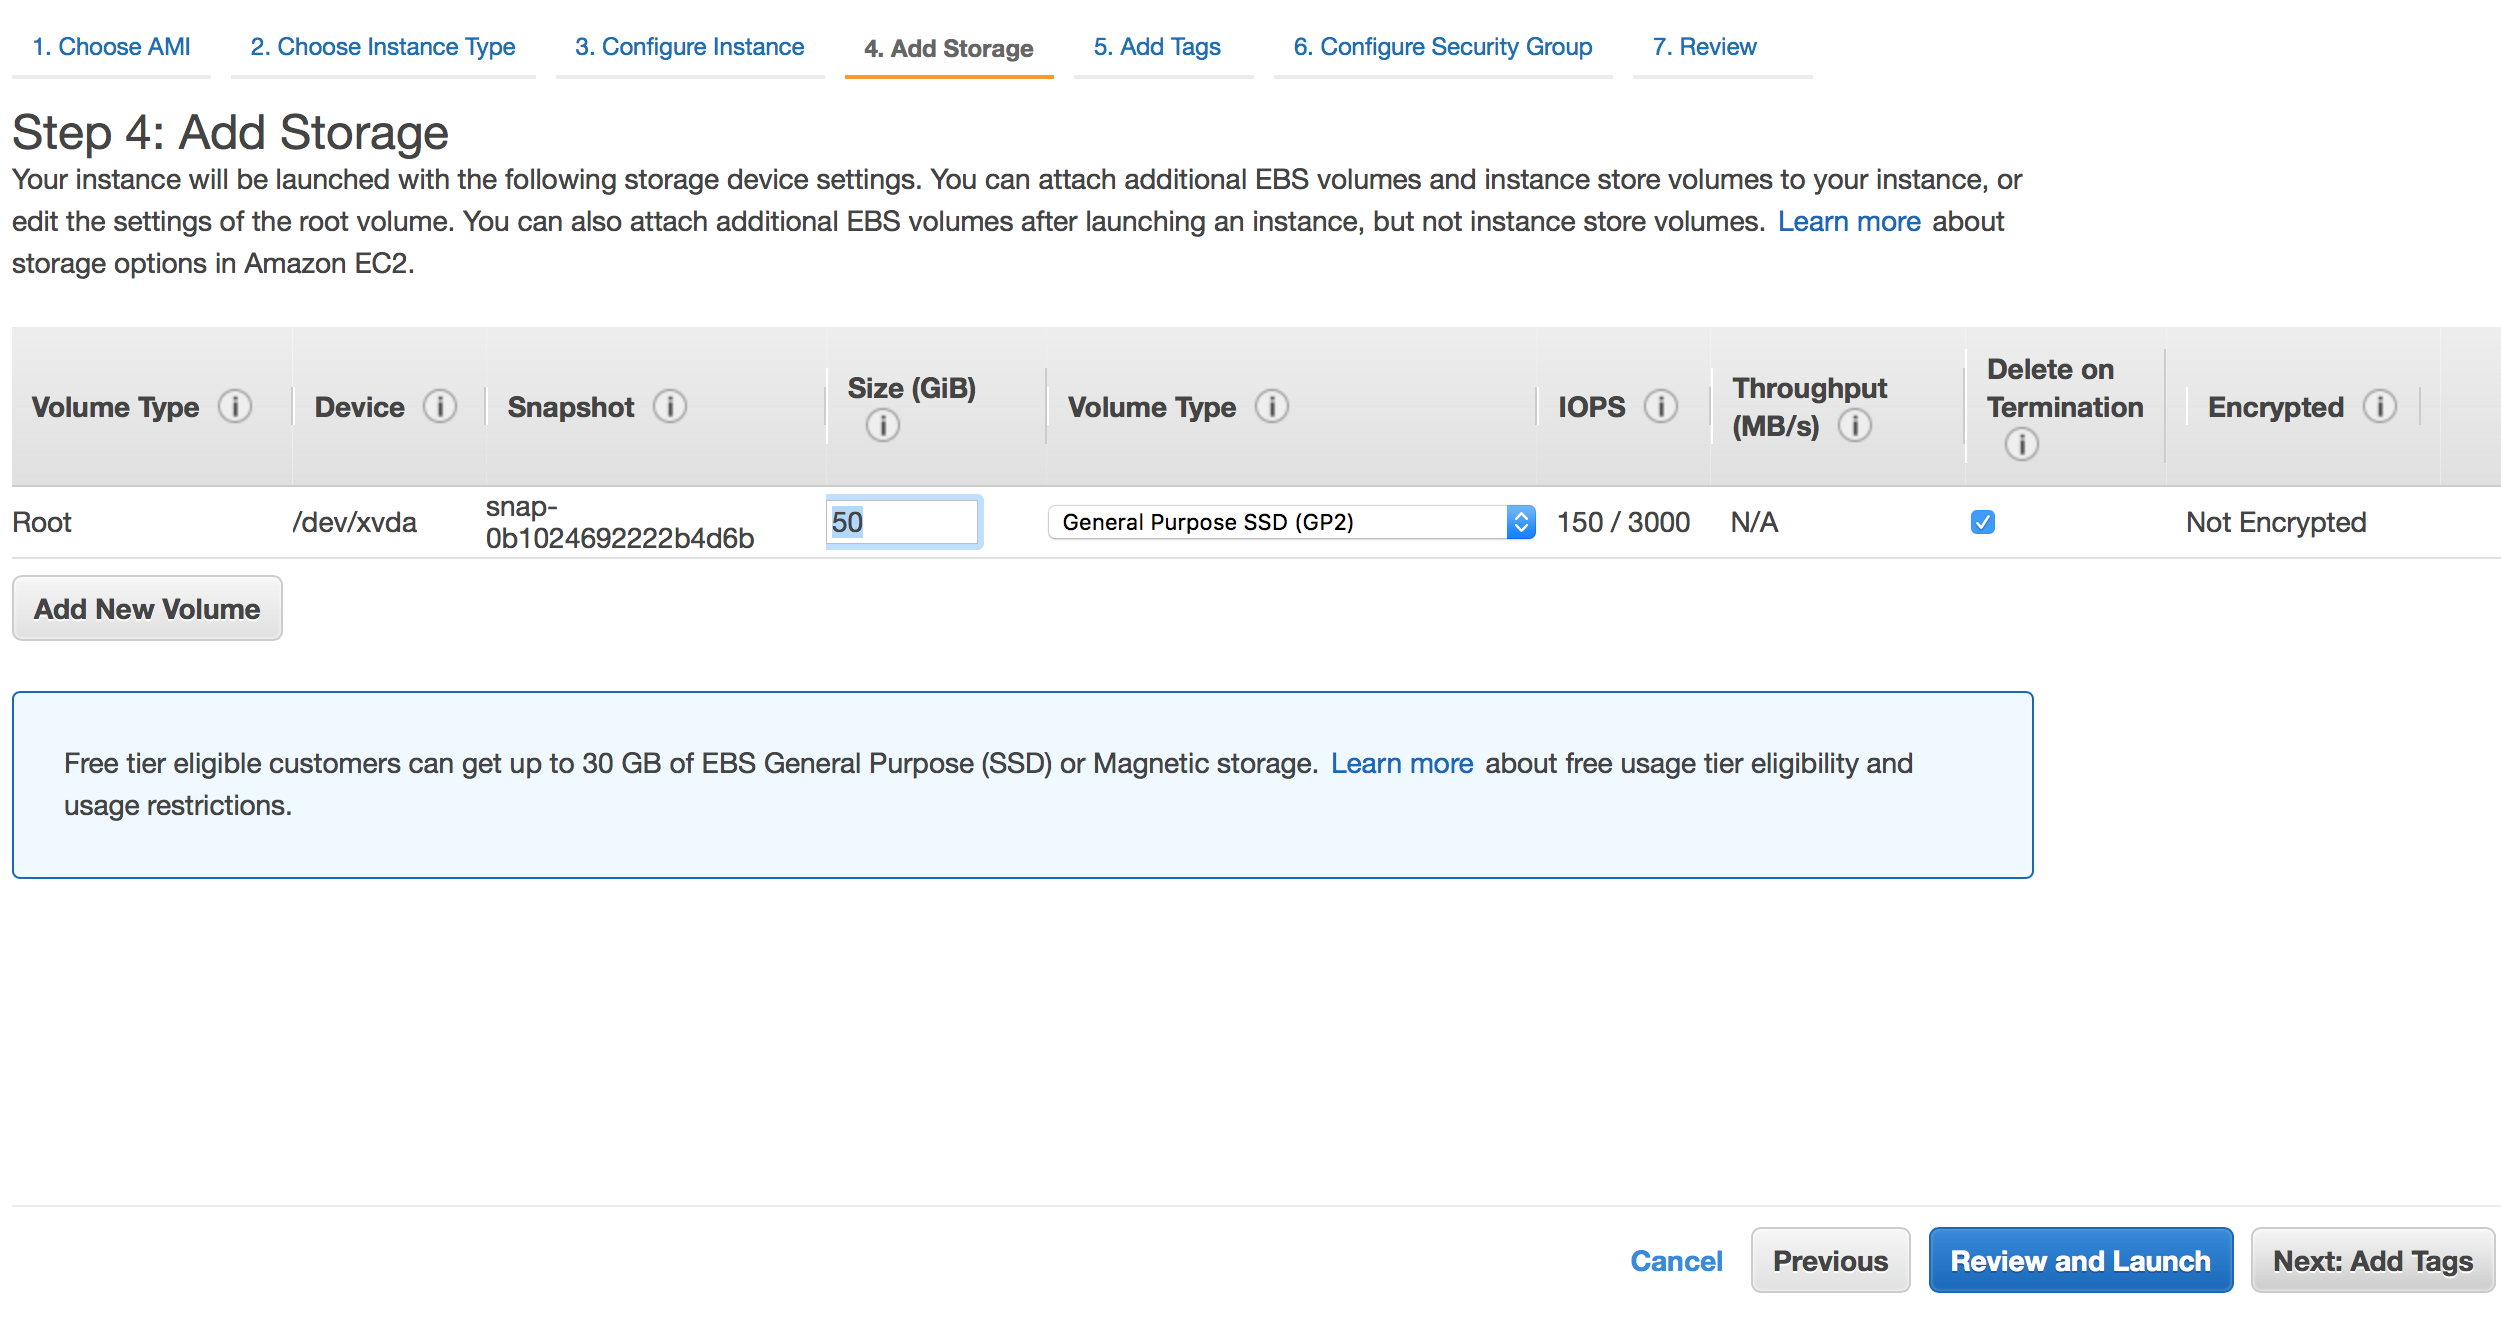

In [10]:
Image(filename="../Desktop/i4.png") 

Step 6: Assign a key-value pair to uniquely identify the volumes, instances or both.

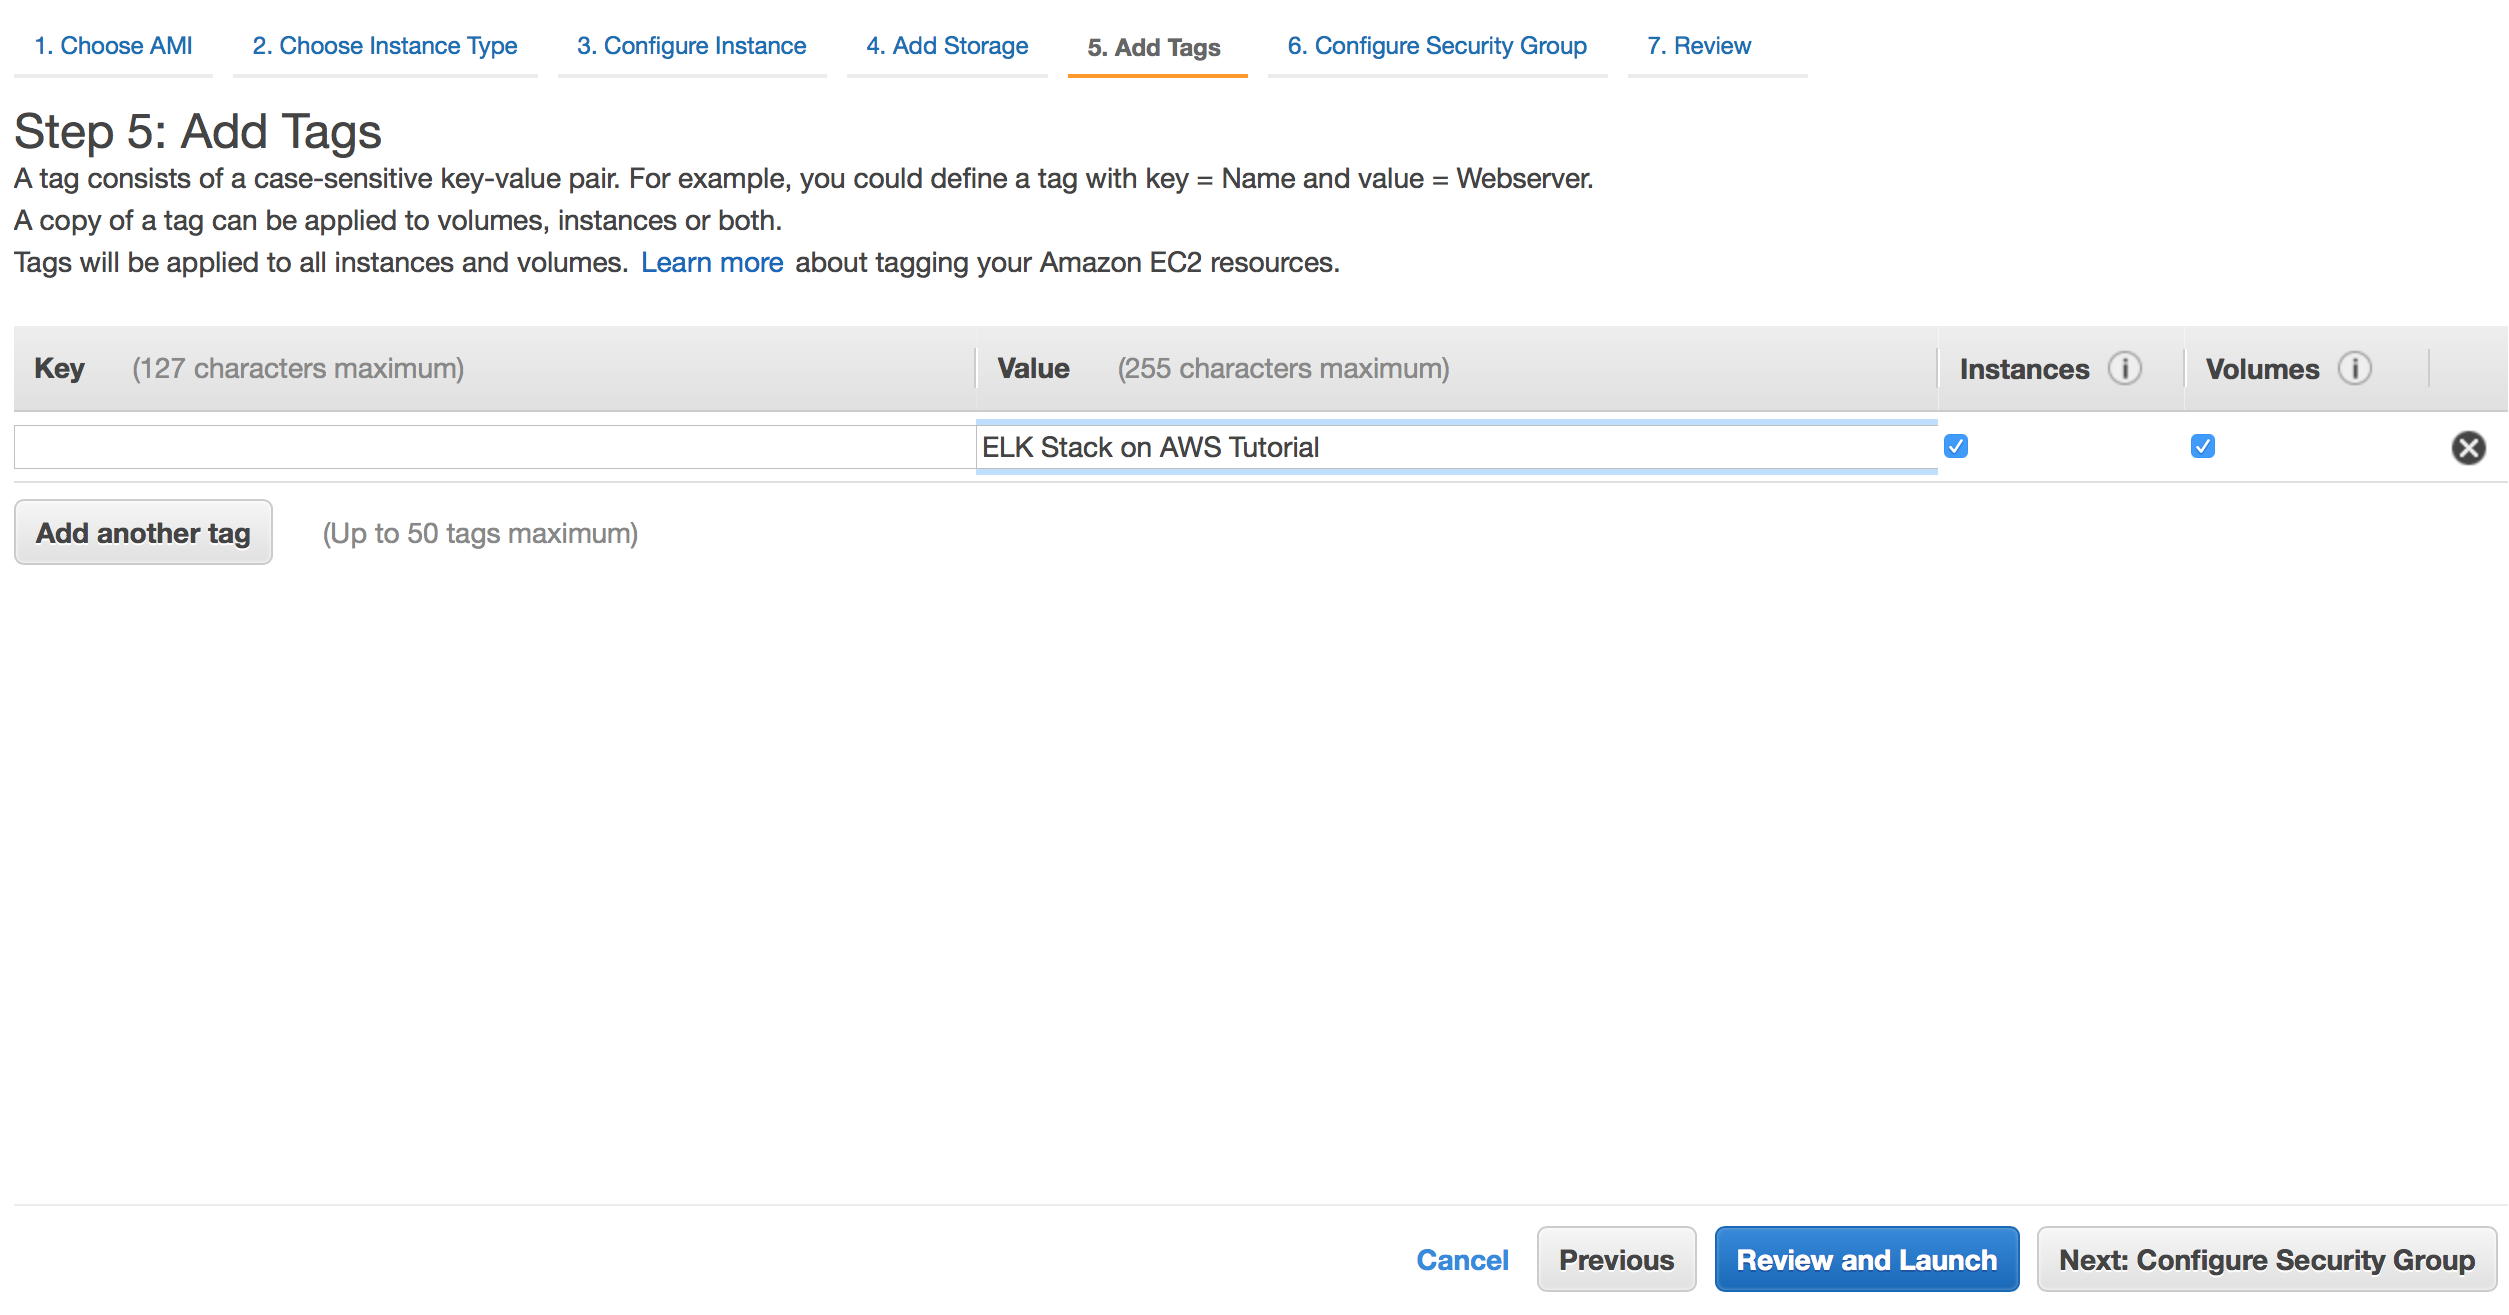

In [42]:
Image(filename="../Desktop/i5.png") 

Step 7: Configure the security group based on the protocol, port range and source. There are a few default options available as well. But its best to create a new secuirty group and set the parameters as per your usage. in this case, I've kept no restrictions on any of the parameters. So any protocol be it http, ssh, https etc can be used to connect to me on any port and the traffic can come from any source.

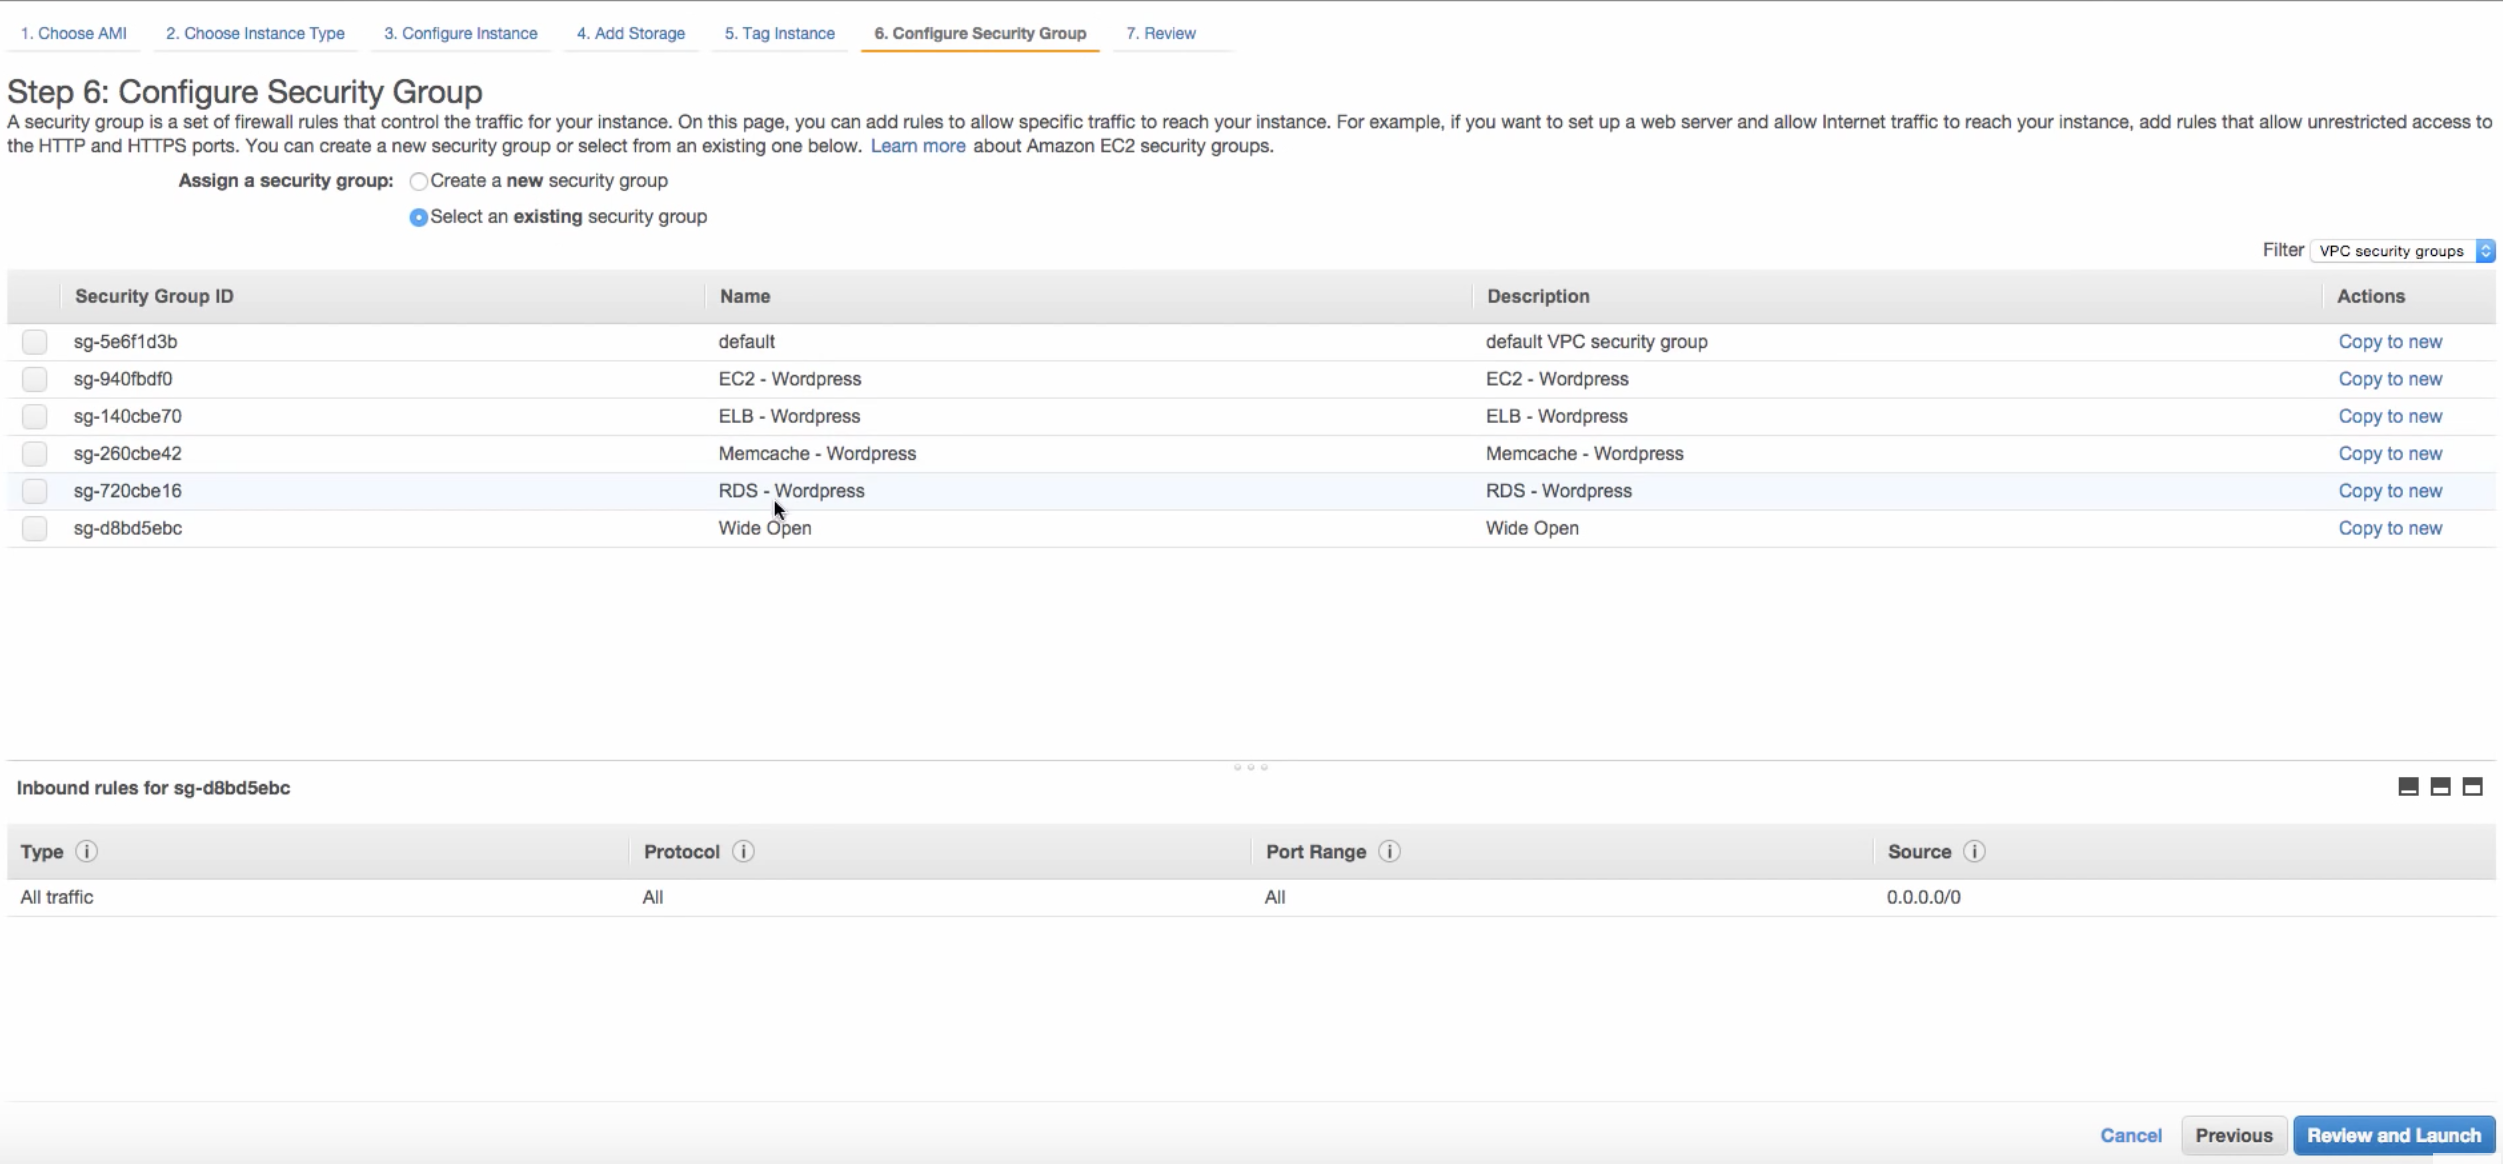

In [12]:
Image(filename="../Desktop/i6.png") 

Step 8: After clicking 'Review and Launch' on the previous step, you will get a private key to save. Then this page with all your instances will show up.

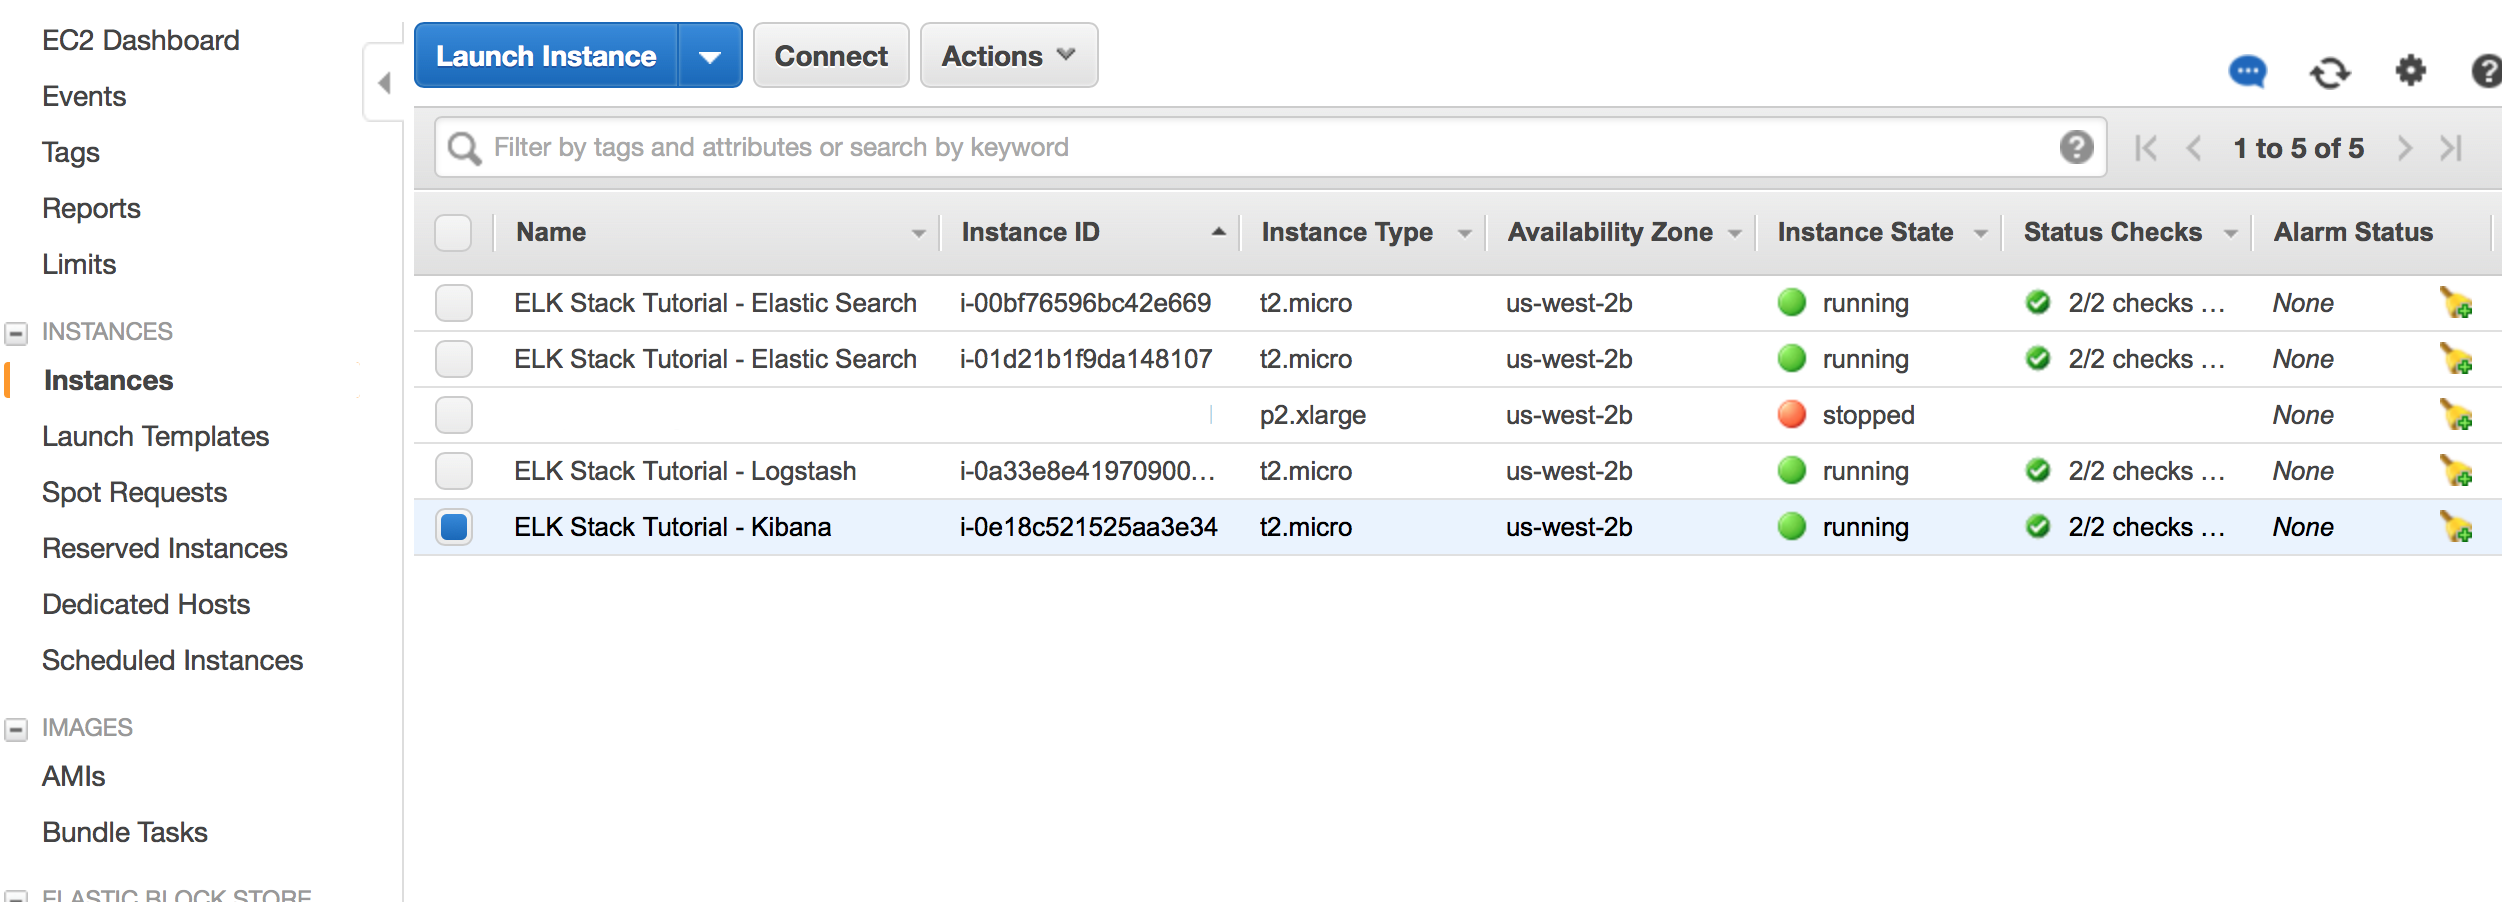

In [13]:
Image(filename="../Desktop/i7.png") 

Step 9: Click on connect for each of your instances (in the order given in Part 2 below) and then copy and paste the line given under example in the directory of your private key file in the terminal or command prompt(for Windows) to install and configure their respective softwares on those instances.

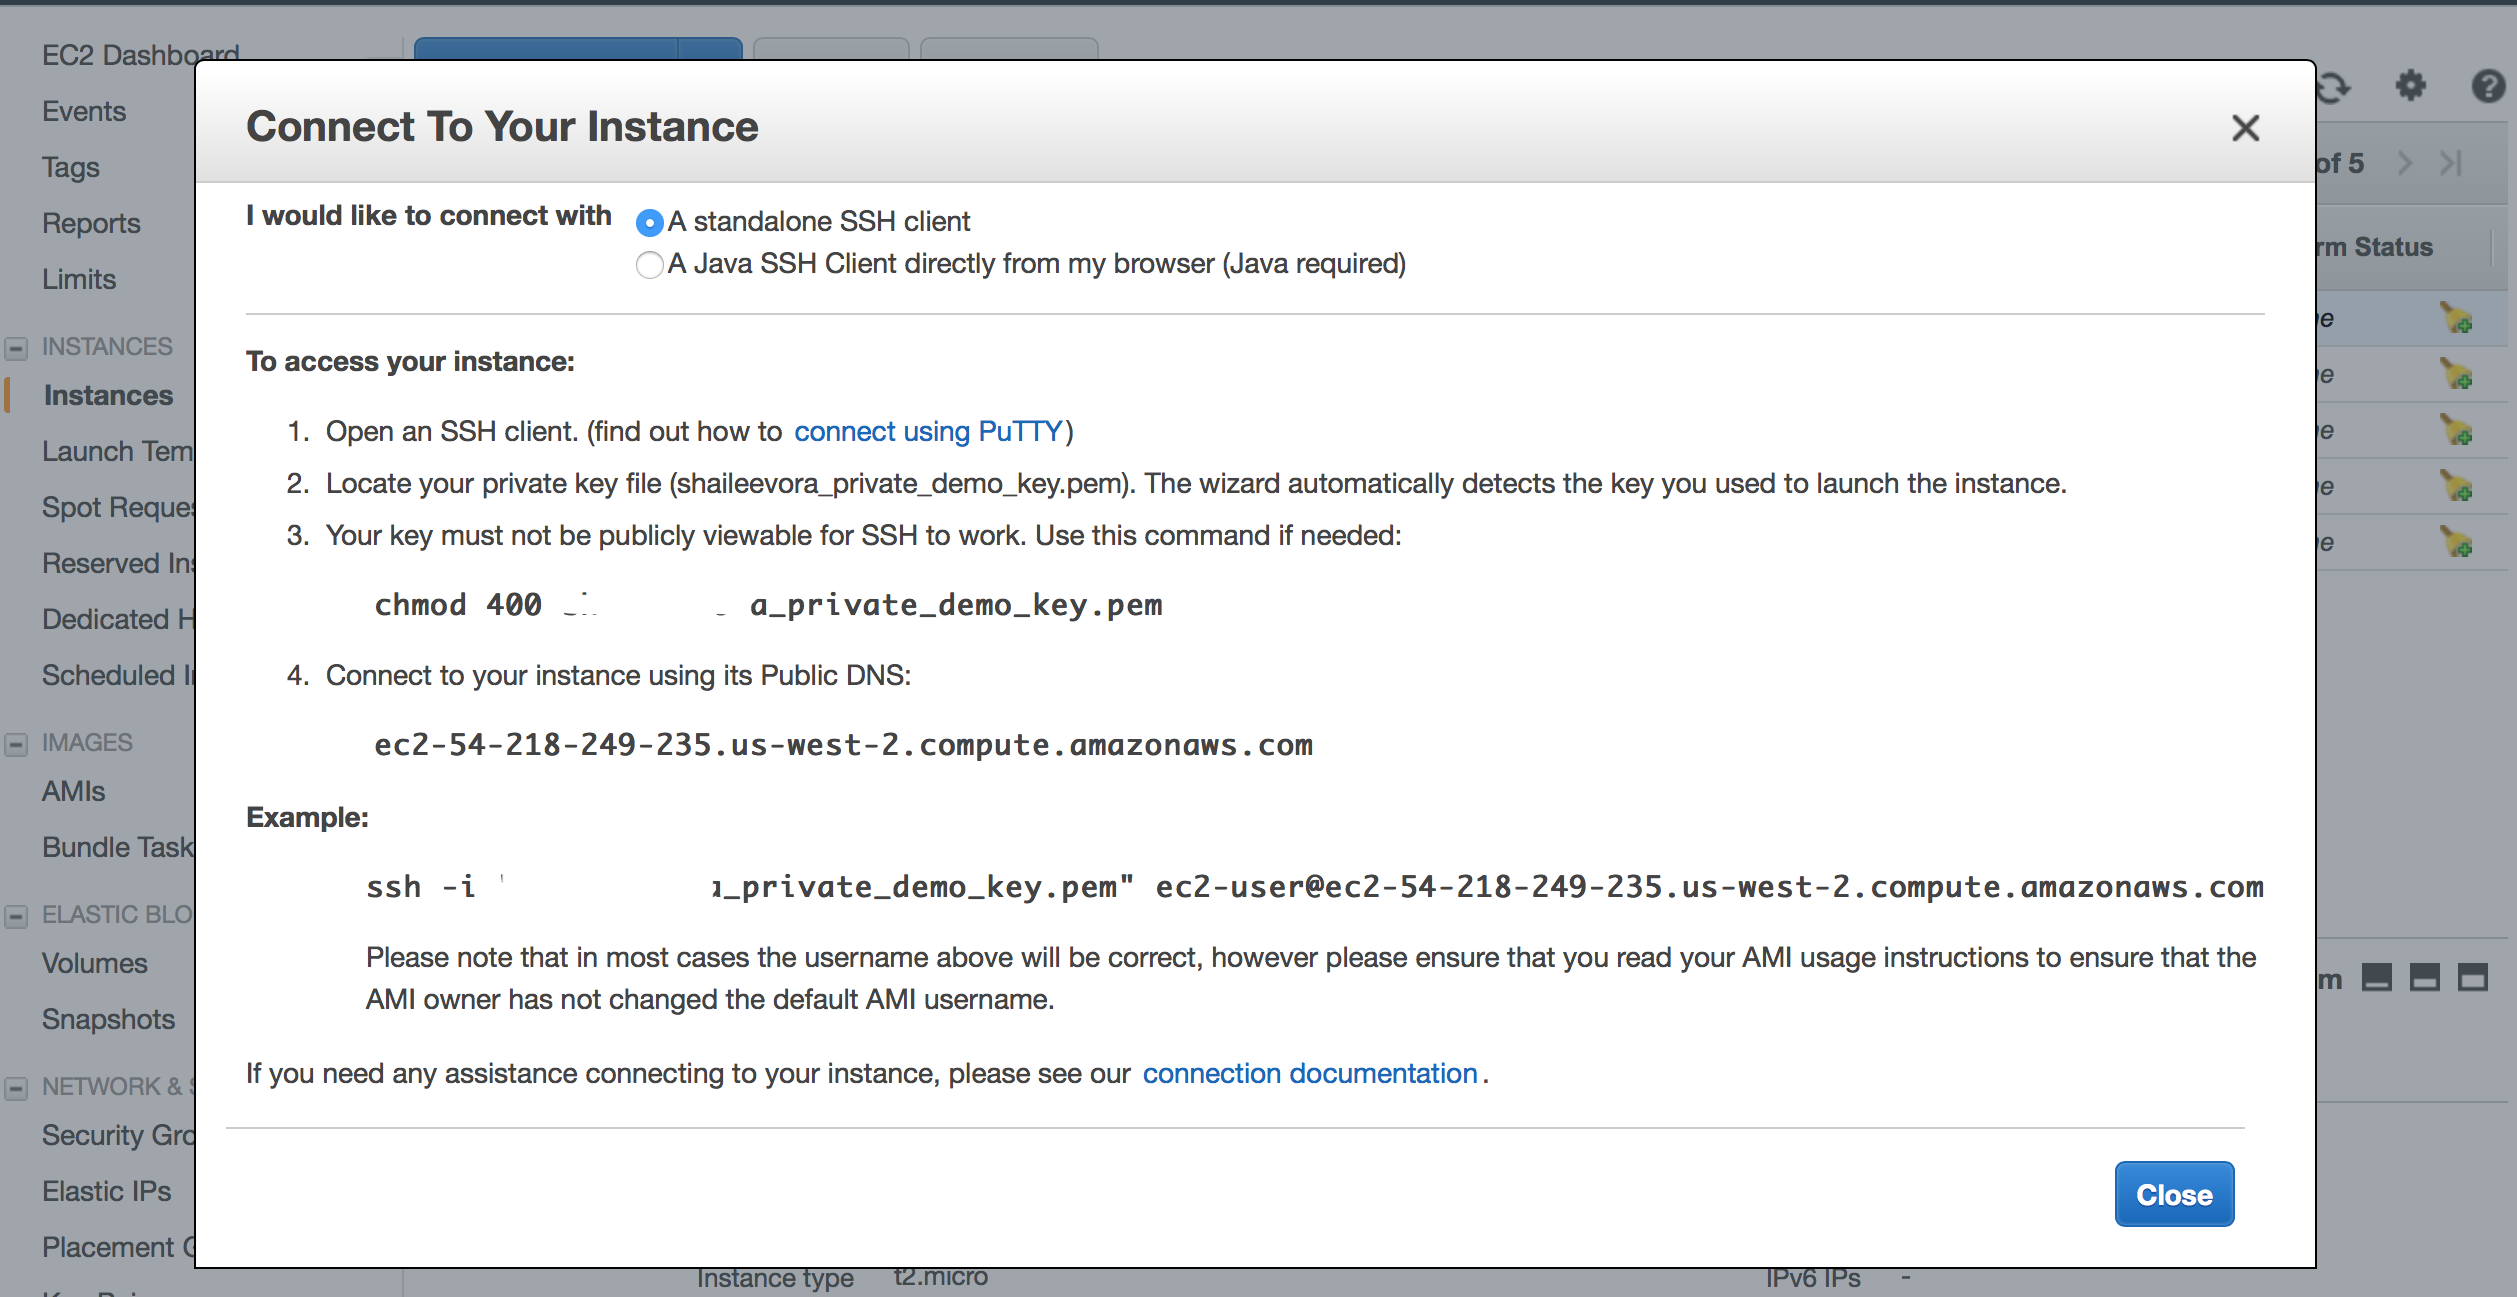

In [14]:
Image(filename="../Desktop/i8.png") 

##### Part 2: Commands to Install and Configure Elastic search 

Step 1: Install Elastic Search version 1.7.2 (You can install any stable version).

In [ ]:
sudo su
yum update -y
cd /root
wget https://download.elastic.co/elasticsearch/elasticsearch/elasticsearch-1.7.2.noarch.rpm
yum install elasticsearch-1.7.2.noarch.rpm -y
rm -f elasticsearch-1.7.2.noarch.rpm
cd /usr/share/elasticsearch/


#Adding some plugins whose functionality is explained below
./bin/plugin -install mobz/elasticsearch-head
./bin/plugin -install lukas-vlcek/bigdesk
./bin/plugin install elasticsearch/elasticsearch-cloud-aws/2.7.1
./bin/plugin --install lmenezes/elasticsearch-kopf/1.5.7

cd /etc/elasticsearch
nano elasticsearch.yml

Step 2: Configure Elastic Search by adding the following commands to elasticsearch.yml.

In [ ]:
cluster.name: awstutorialseries

#Go to Security section of AWS and generate access-key and secret key at that moment using IAM 
cloud.aws.access_key: ACCESS_KEY_HERE 
cloud.aws.secret_key: SECRET_KEY_HERE 
    
cloud.aws.region: us-east-1 #add your aws region here
discovery.type: ec2 #you can comment this out if the image in Step 4 below doesn't show up
discovery.ec2.tag.Name: "ELK Stack Tutorial - Elasticsearch"
http.cors.enabled: true
http.cors.allow-origin: "*"

Step 3: Exit from the elasticsearch.yml file and type the following command to start elasticsearch.

In [ ]:
service elasticsearch start

Step 4: Go to the aws page and copy the Public IP address/ domain name of that instance on to a new tab along with the port number 9200 as http://domainname:9200 to get the following image which shows that elastic search is working fine.

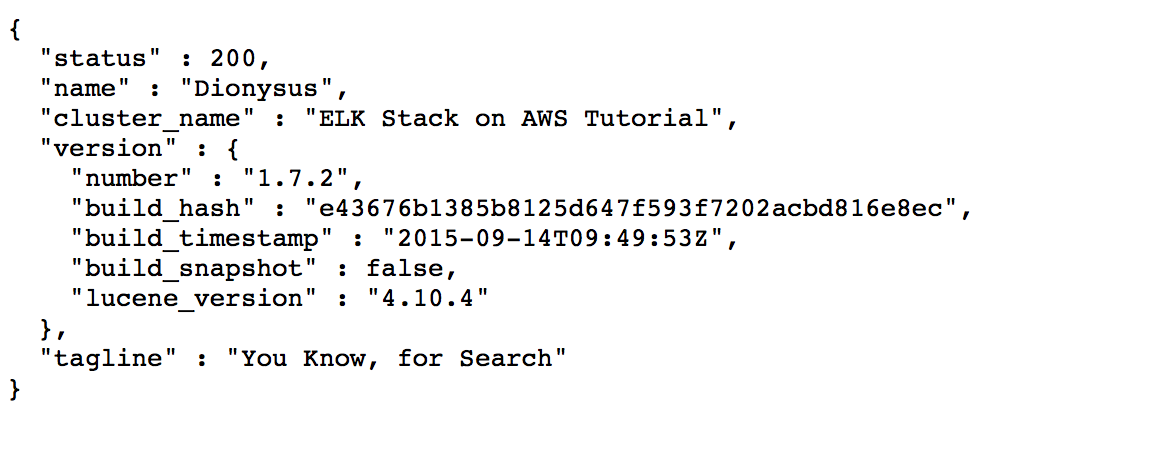

In [17]:
Image(filename="../Desktop/i11.png") 

Step 5: In order to balance the load, you can configure a load balancer. If you don't wish to balance the load, jump to step 8.

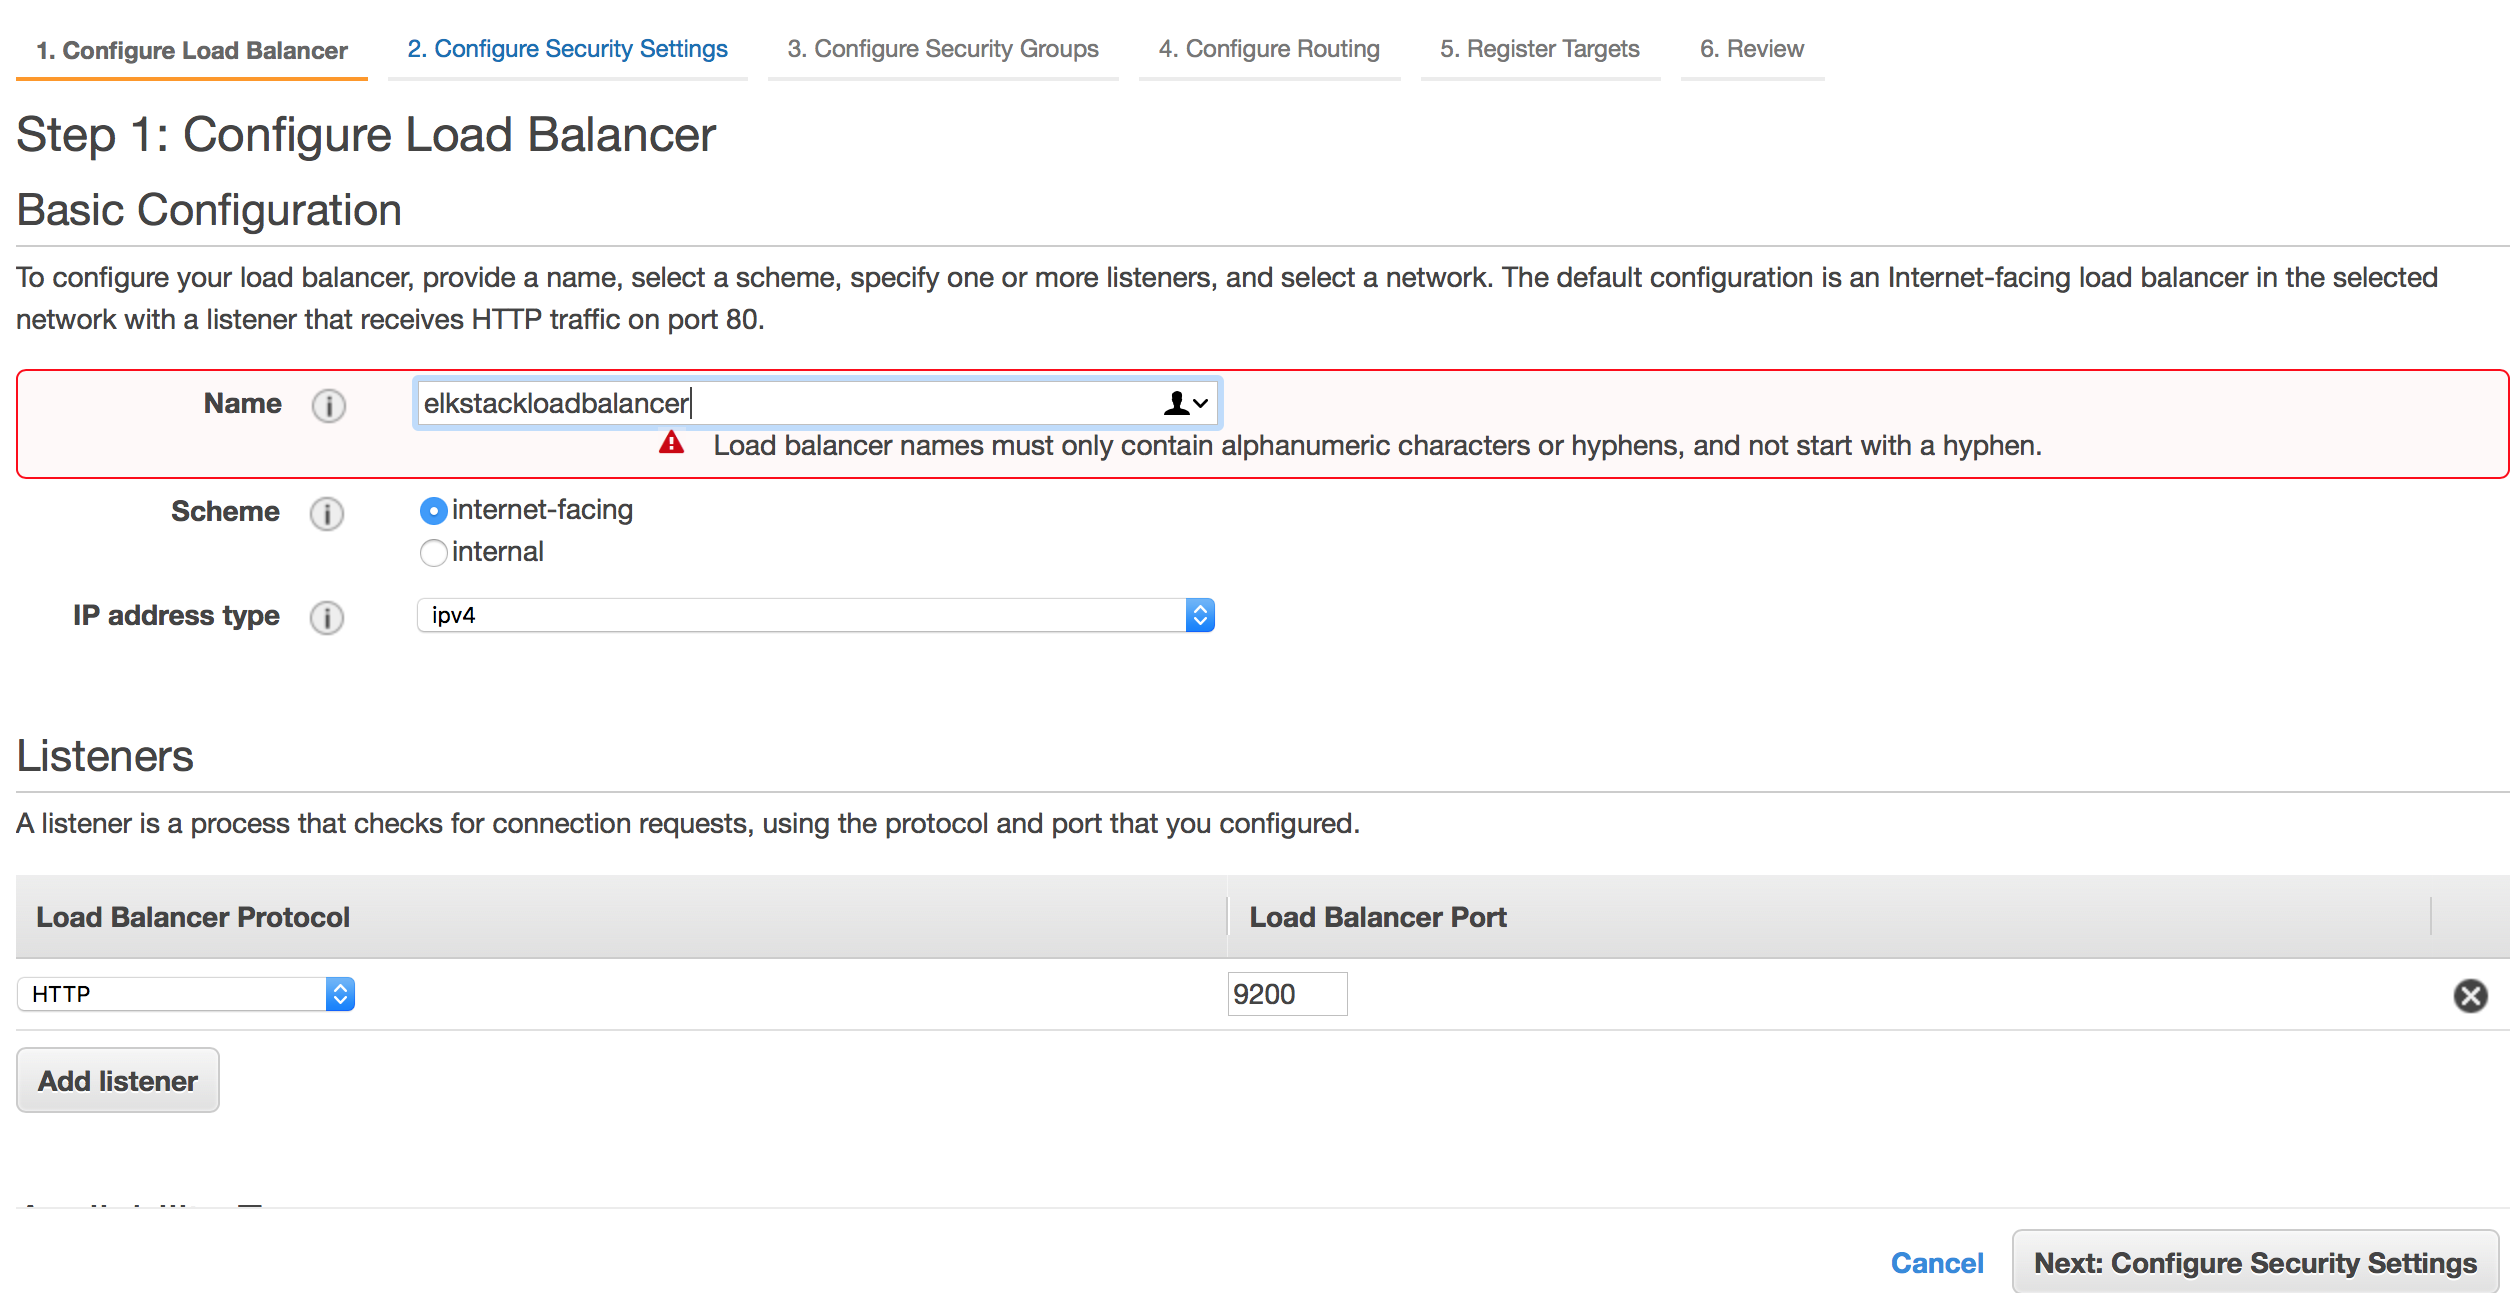

In [18]:
Image(filename="../Desktop/i12.png") 

Step 6: Choose all the zones you want to ditribute your load to.

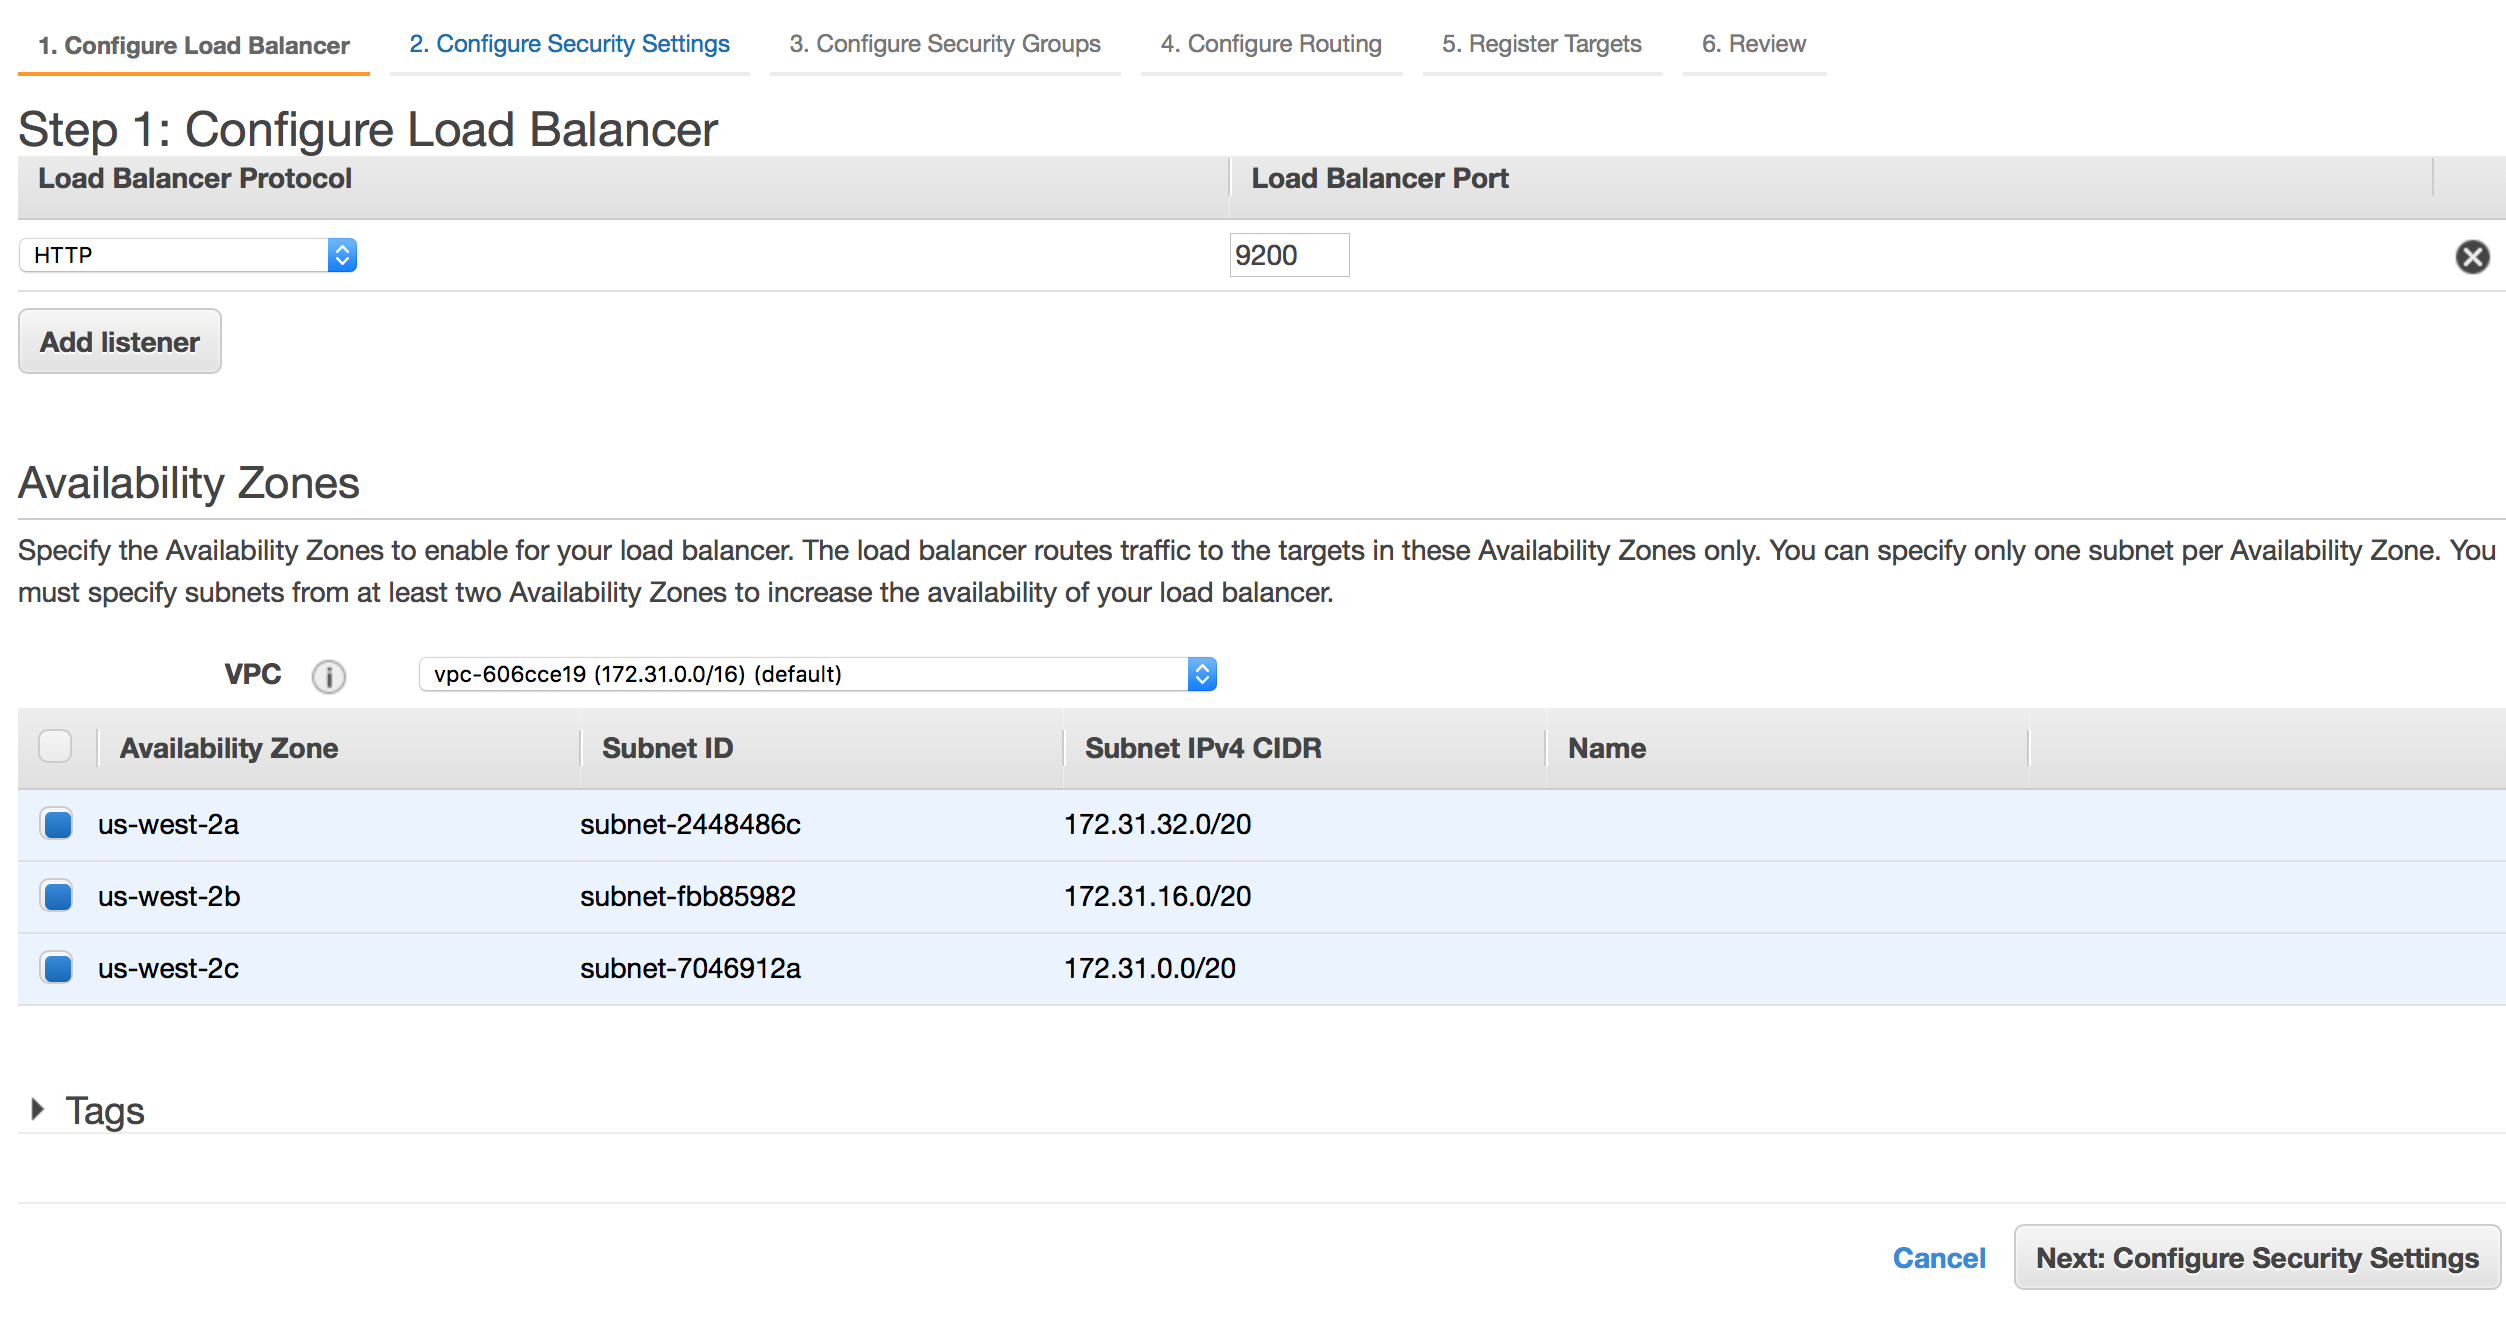

In [19]:
Image(filename="../Desktop/i13.png") 

Step 7: Configure the routing of the load balancer's requests to the target mentioned here and then review and create the load balancer.

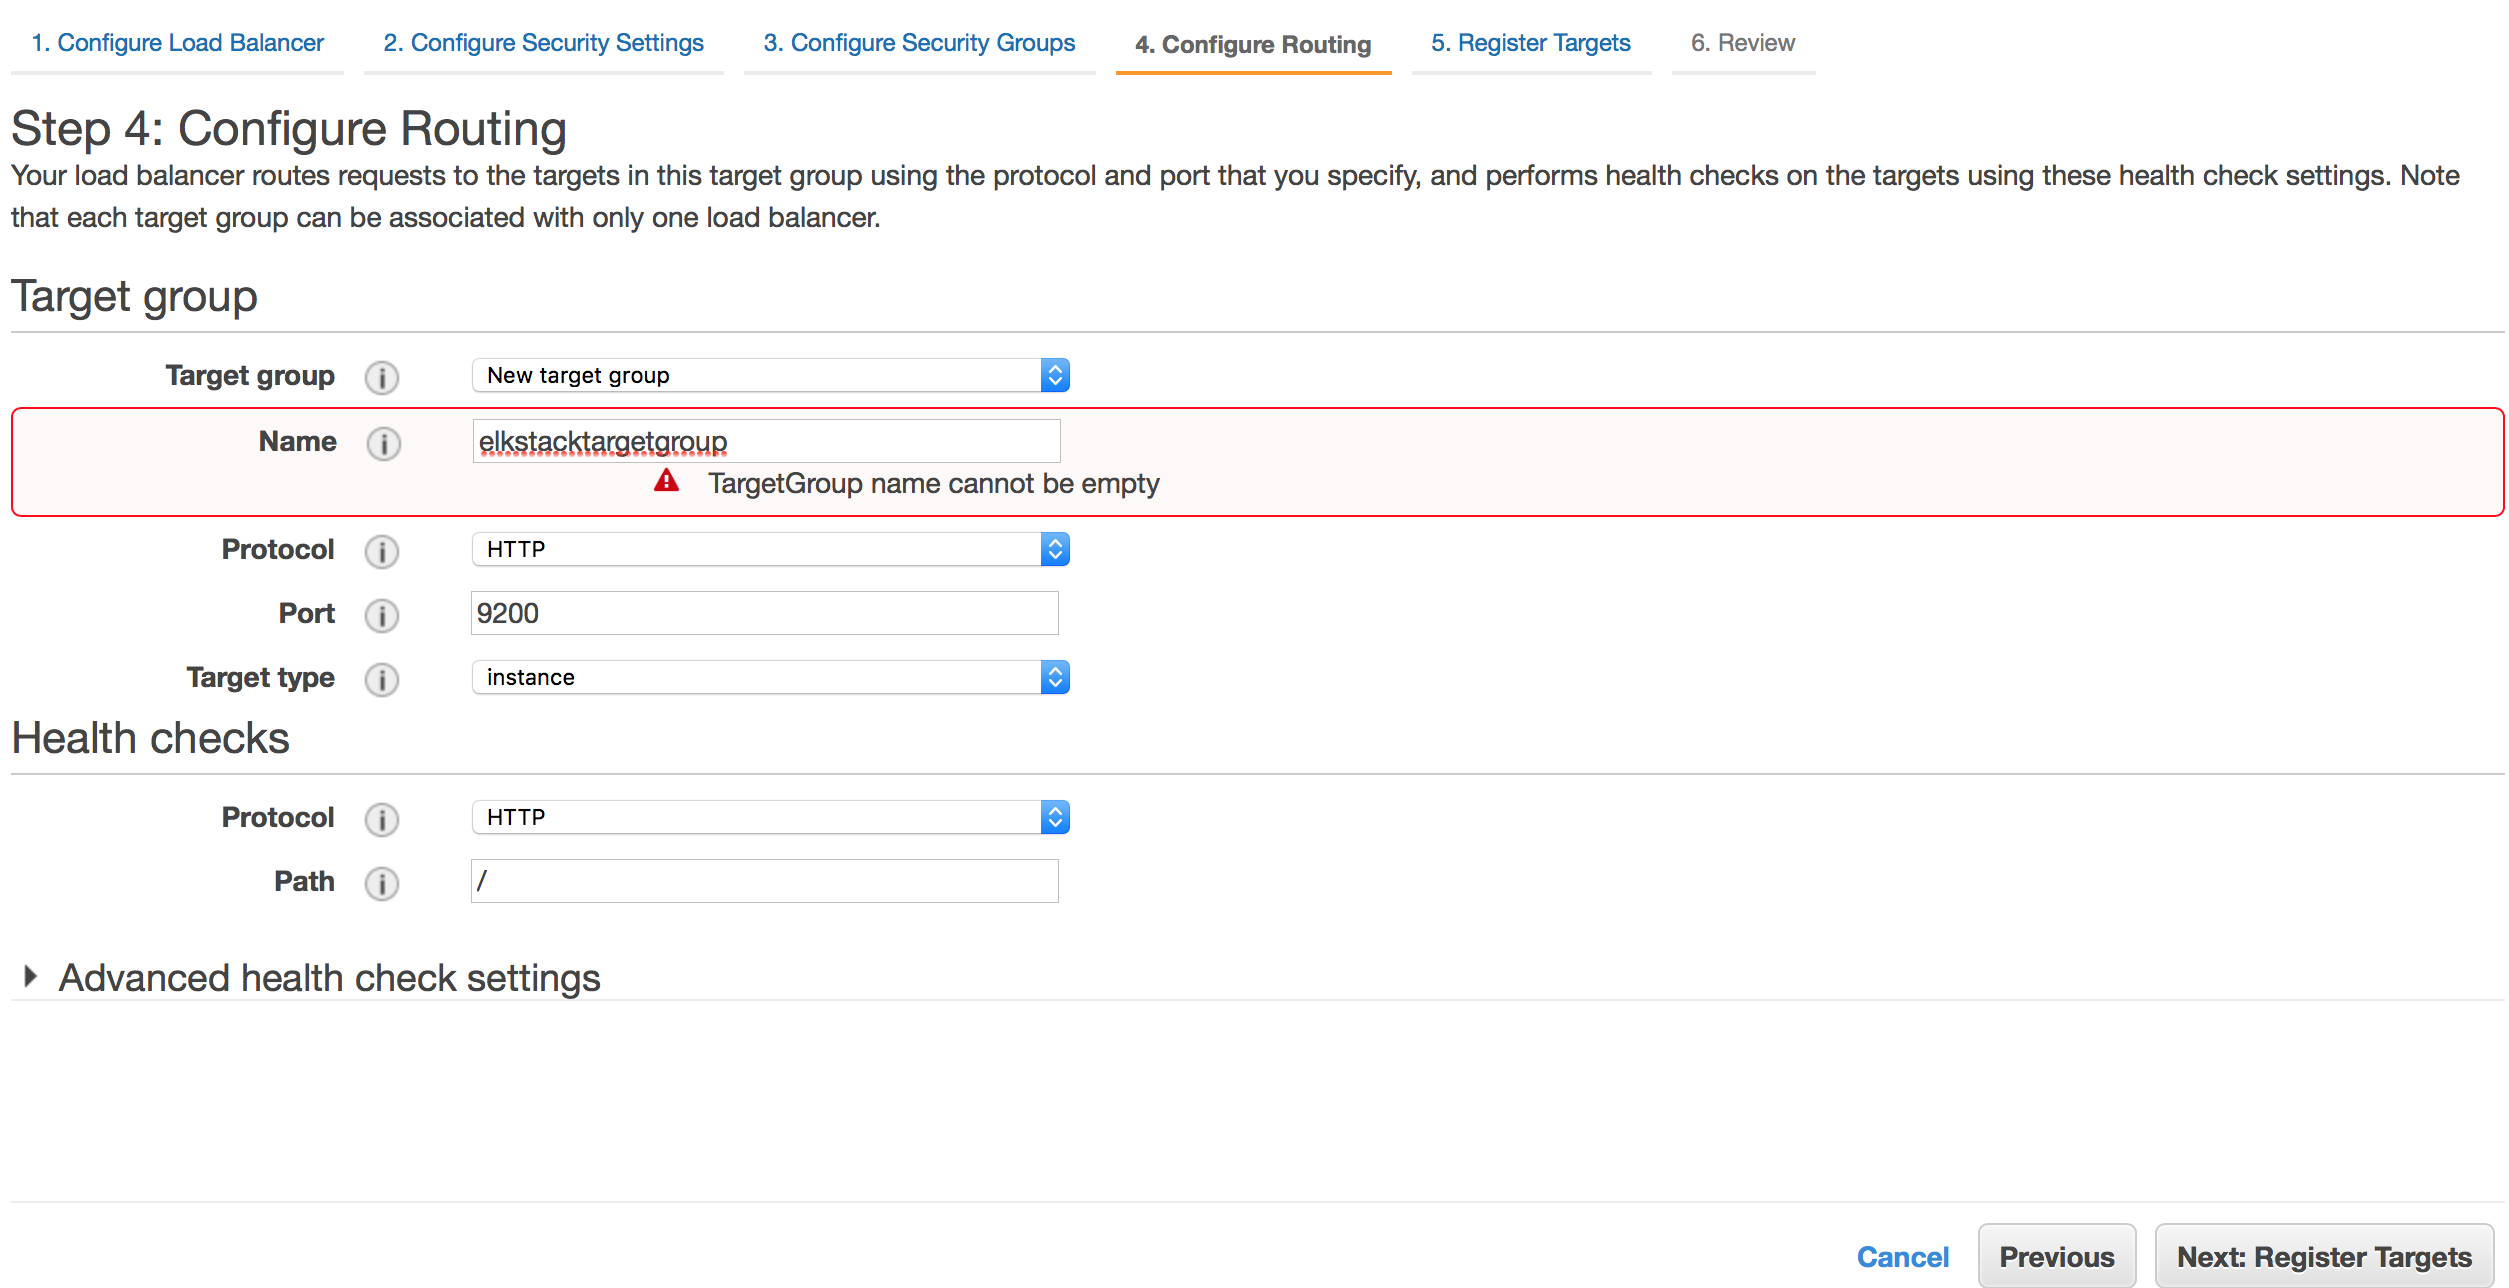

In [20]:
Image(filename="../Desktop/i14.png") 

##### Part 3: Commands to Install and Configure Logstash

Step 1: Install Logstash version 1.5.4-1 (any stable version can be downloaded).

In [ ]:
sudo su
yum update -y
cd /root
wget https://download.elastic.co/logstash/logstash/packages/centos/logstash-1.5.4-1.noarch.rpm
yum install logstash-1.5.4-1.noarch.rpm -y
rm -f logstash-1.5.4-1.noarch.rpm
nano /etc/logstash/conf.d/logstash.conf

Step 2: Configure the logstash.conf file opened by the last command in the previous step. In place of the 'ELASTICSEARCH_URL_HERE', you can put the dns name of the load balancer if you have a load balancer with multiple elastic search instances.

In [ ]:
input { file { path => "/tmp/logstash.txt" } } output { elasticsearch { host => "ELASTICSEARCH_URL_HERE" protocol => "http" } }

Step 3: Exit from the logstash.conf file and type the following command to start logstash.

In [ ]:
#If you want to allow logstash to forcefully close, start logstash using the command given below.
#This, 
service logstash start --allow-unsafe-shutdown
#Else do this simple command
service logstash start

Step 4: Now you can put data into the logstash logs. Here I've used the echo command to do it.

In [ ]:
#Multiple lines of this command with the data you want to insert is fine too
echo 'insert data here' >> /tmp/logstash.txt

Step 5: Then the elastic search servers can query on this data. The head plugin of elastic search can be used to visualize to see the data put into logstash. This plugin can be accessed using http://elastic_search_url:9200/_plugin/head.

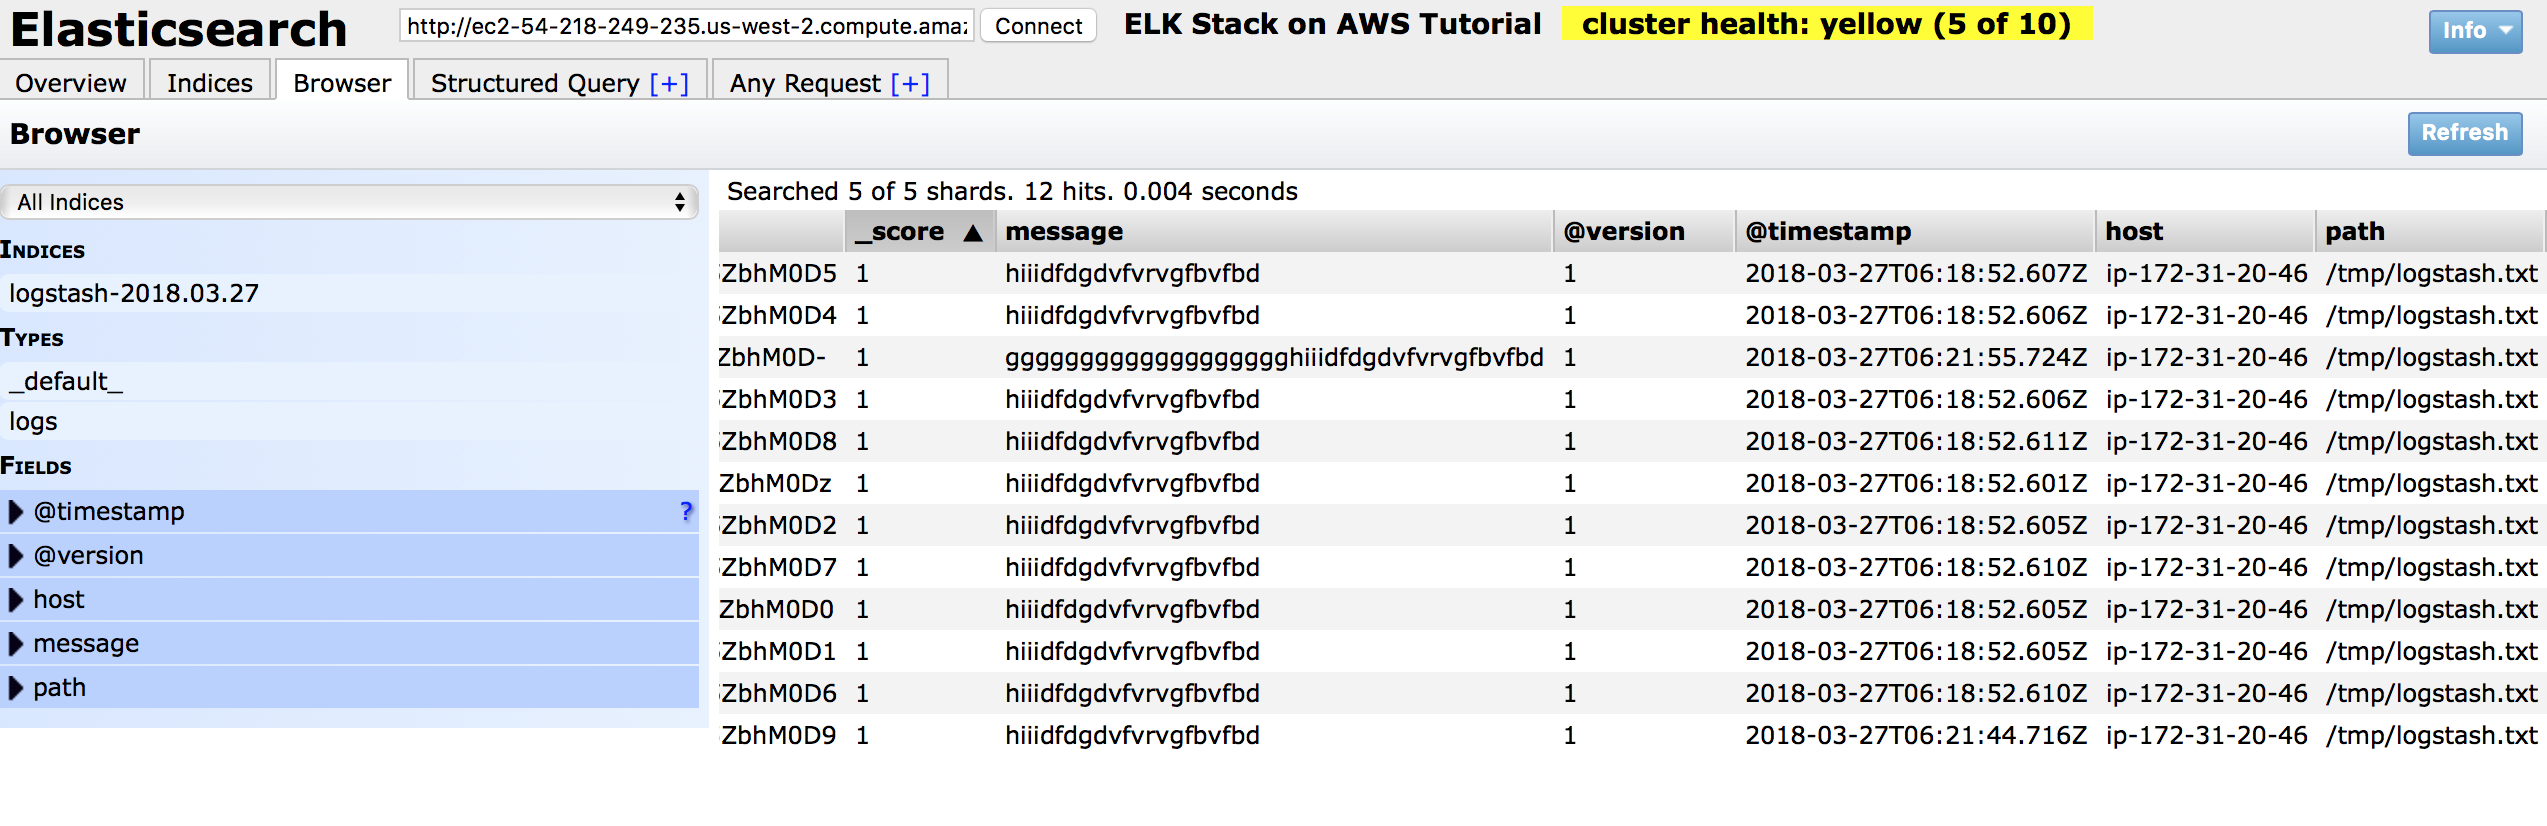

In [22]:
Image(filename="../Desktop/i16.png") 

Step 6: The elastic search plugin called 'bigdesk' can be used to see the logs present in elastic search based on their respective indices (here, timestamp). This plugin can be accessed using http://elastic_search_url:9200/_plugin/head.

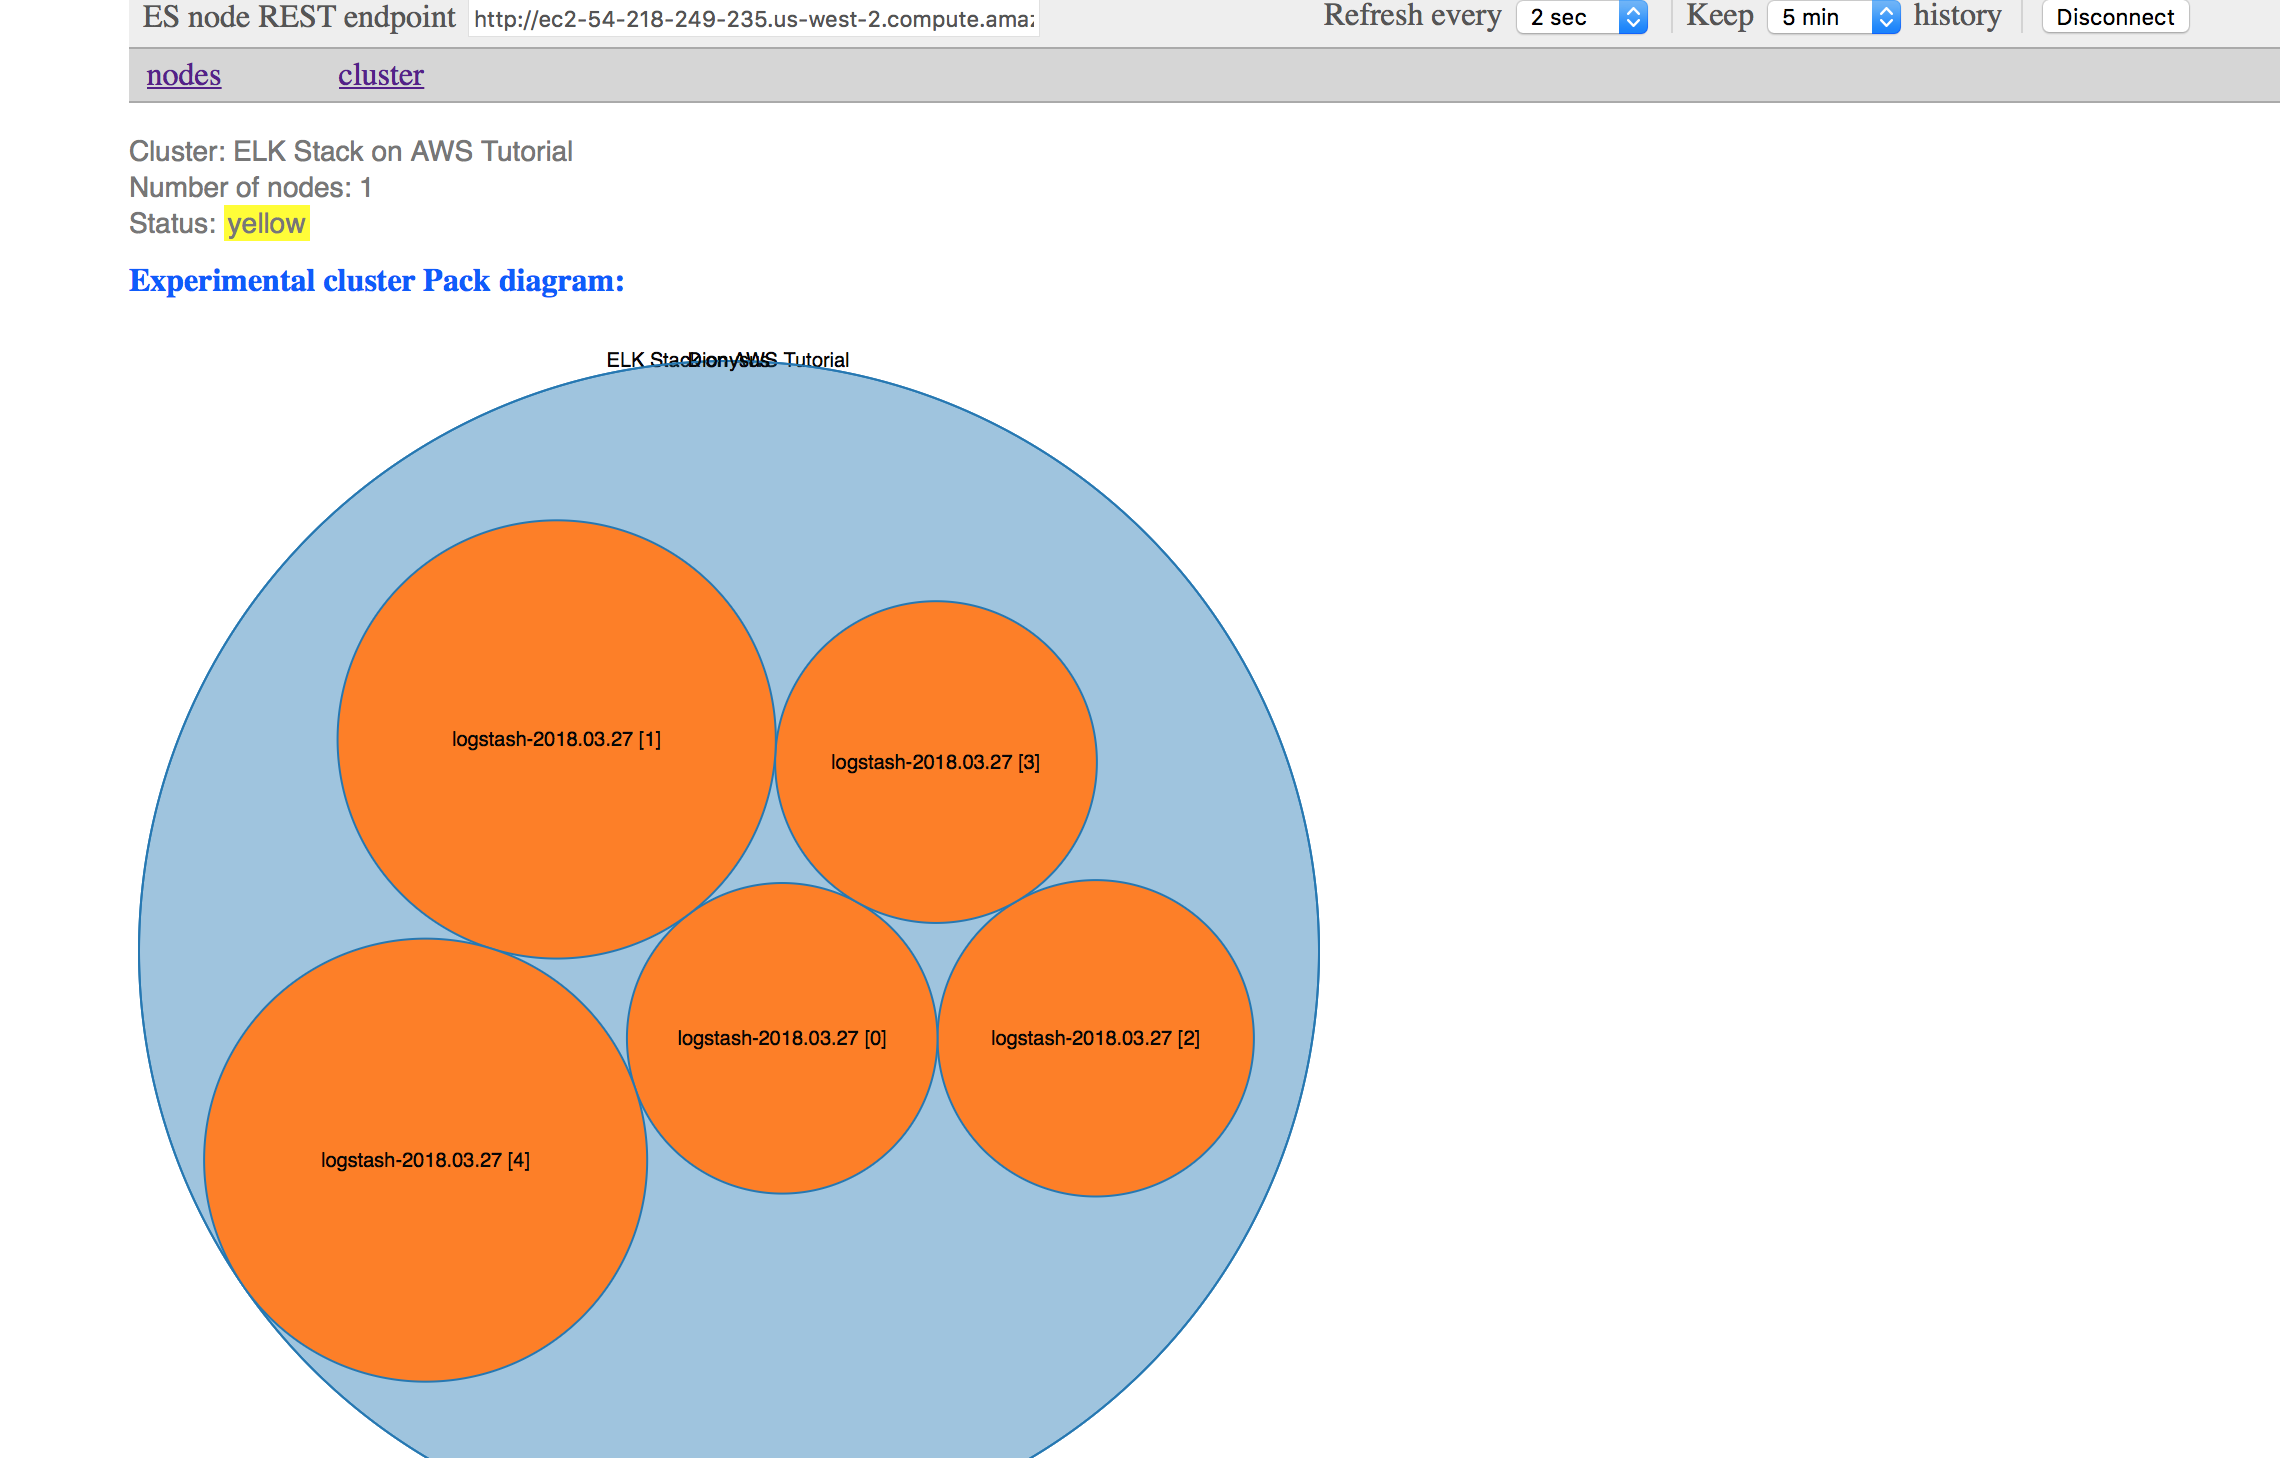

In [23]:
Image(filename="../Desktop/i17.png") 

##### Part 3: Commands to Install and Configure Kibana

Step 1: Install Kibana 4.1.2 (any stable version is fine).

In [ ]:
sudo su
yum update -y
cd /root
wget https://download.elastic.co/kibana/kibana/kibana-4.1.2-linux-x64.tar.gz
tar xzf kibana-4.1.2-linux-x64.tar.gz
rm -f kibana-4.1.2-linux-x64.tar.gz
cd kibana-4.1.2-linux-x64
nano config/kibana.yml

Step 2: Configure the kibana.yml file.

In [ ]:
elasticsearch_url: "ELASTICSEARCH_URL_HERE" #the elasticsearch_url can be a load balancer domain name as well

Step 3: To let kibana run in the background, type the following command.

In [ ]:
nohup ./bin/kibana &

Step 4: Then type control+x or command+x and navigate to the browser using the url http://KIBANA_URL:5601/ where the kibana_url is the public domain name or public IP address of the kibana instance on AWS. 

This is how the startup page of kibana would look and it has already detected logstash as it can be seen from the image. The time field name has to be specified because a lot if not all of the reports required from kibana have some time component involved as it is generally the report over a certain time period over which the software ran.

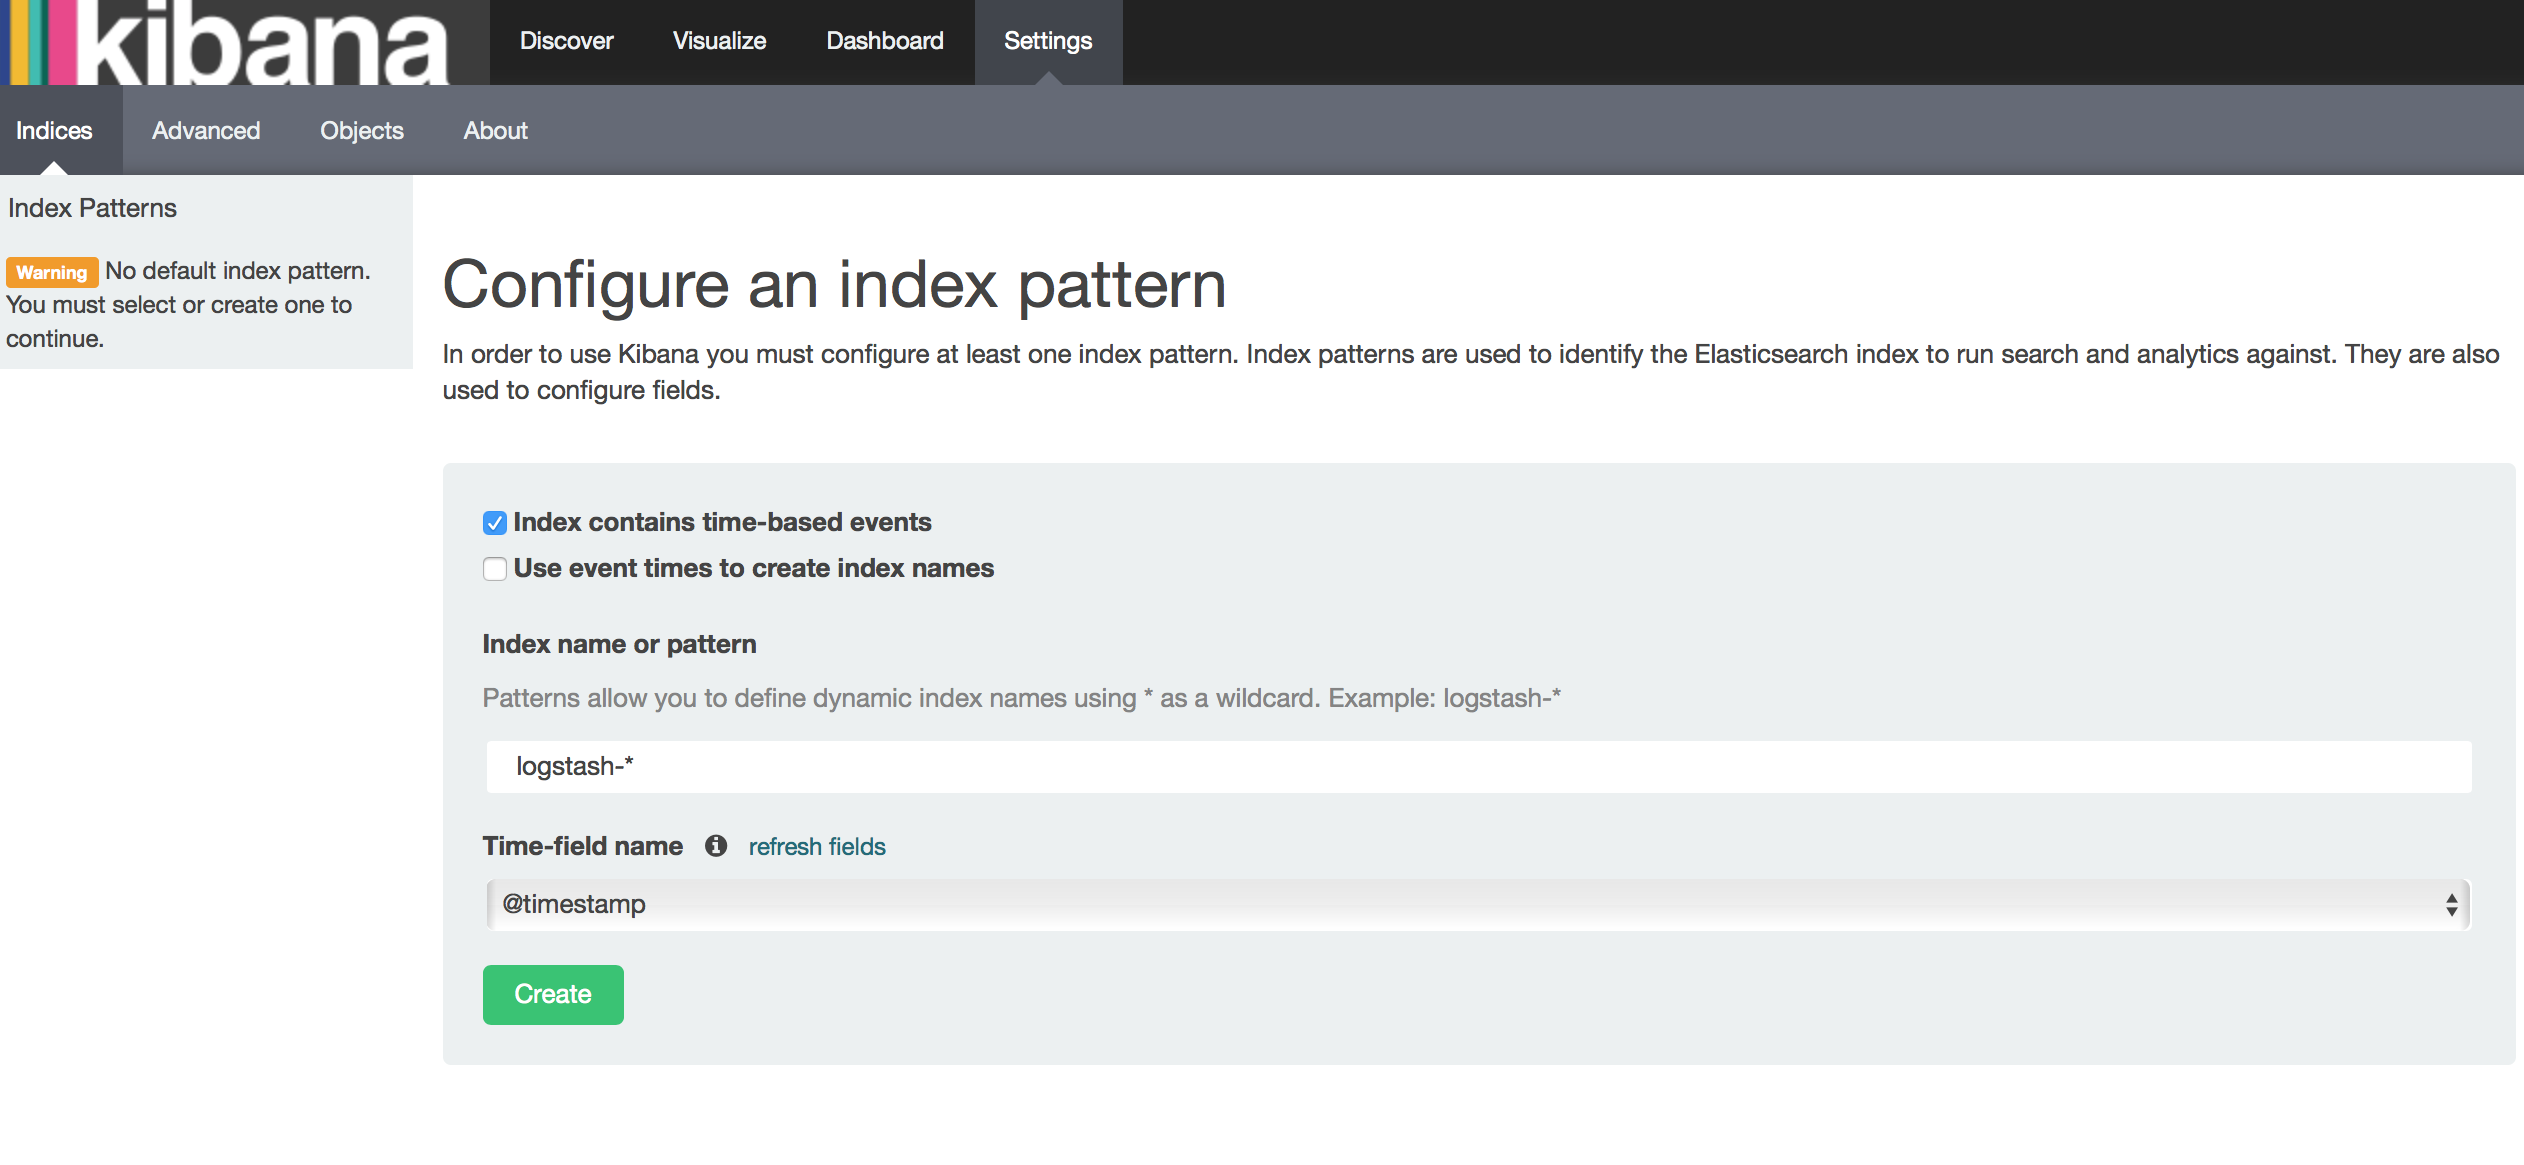

In [43]:
Image(filename="../Desktop/i21.png") 

If you go to visualize then you can see various statistics. Here it has the count of messages put into logstash at over a 3 hour time period.

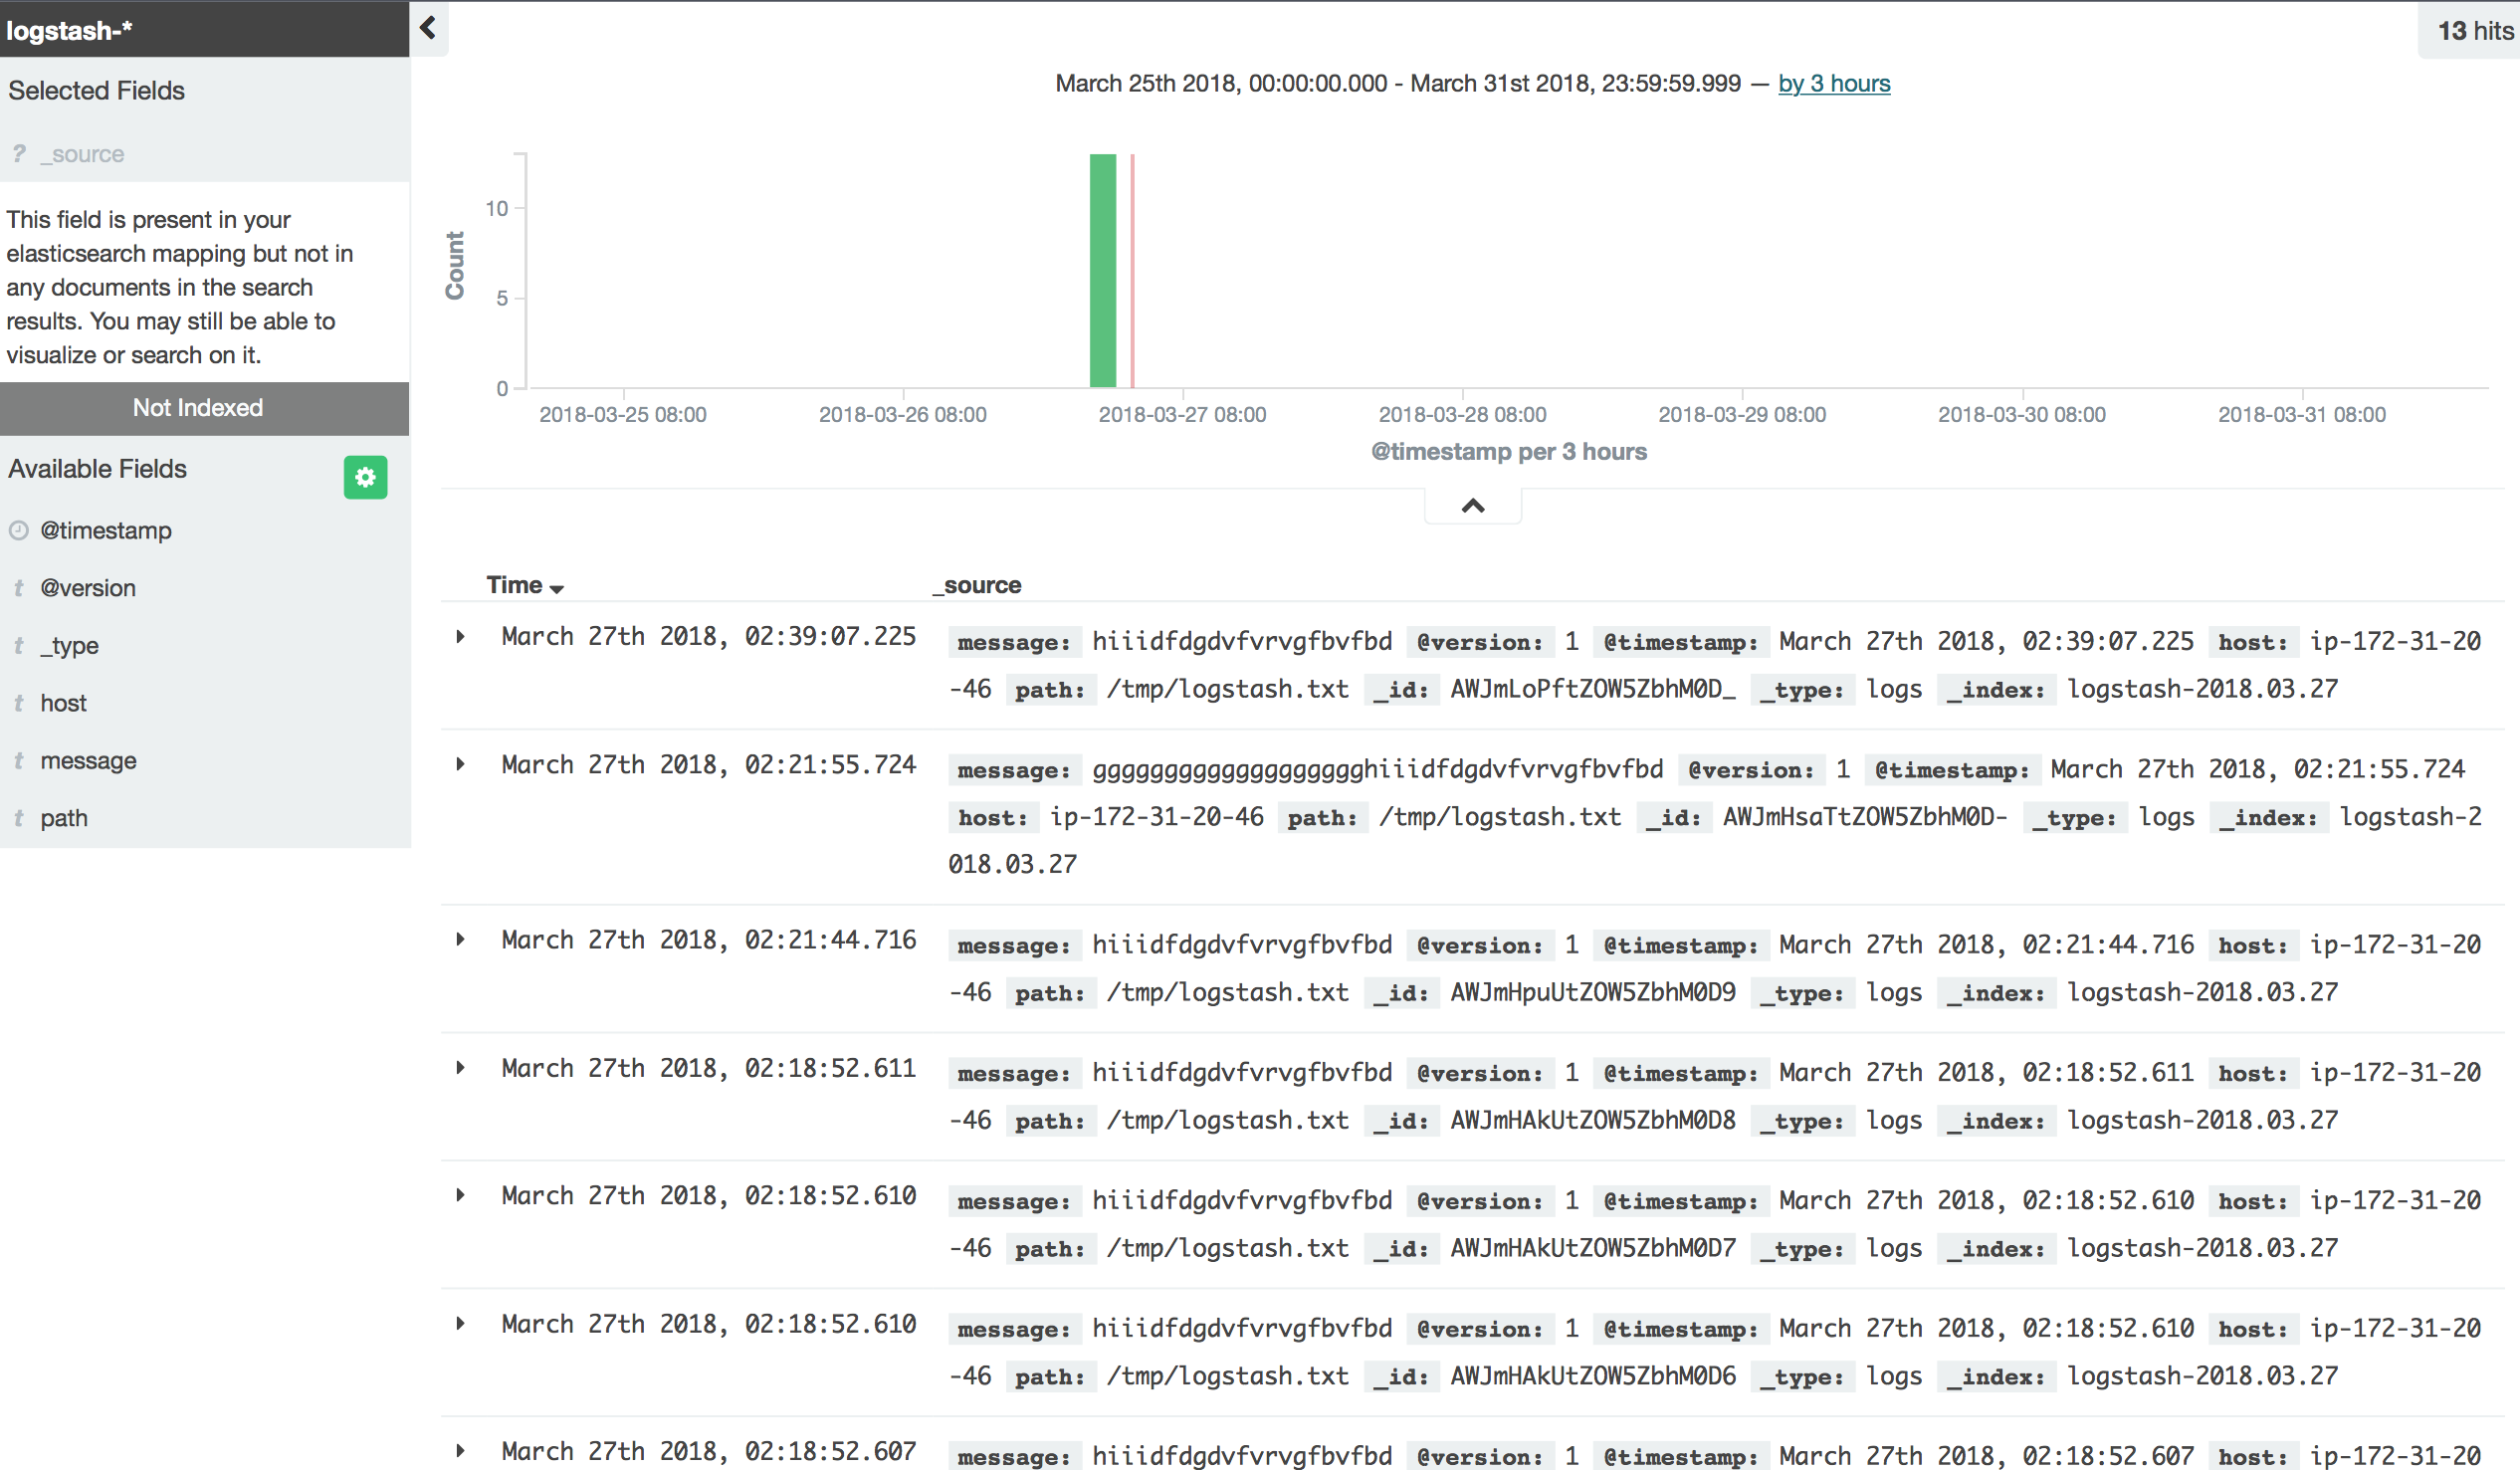

In [46]:
Image(filename="../Desktop/i19.png") 

Now if you go to the bigdesk plugin, you'd be able to see a kibana component as well in the elastic search framework. This signifies the component that gives out the data obtained by querying the logstash logs on elastic search to kibana for visualization. 

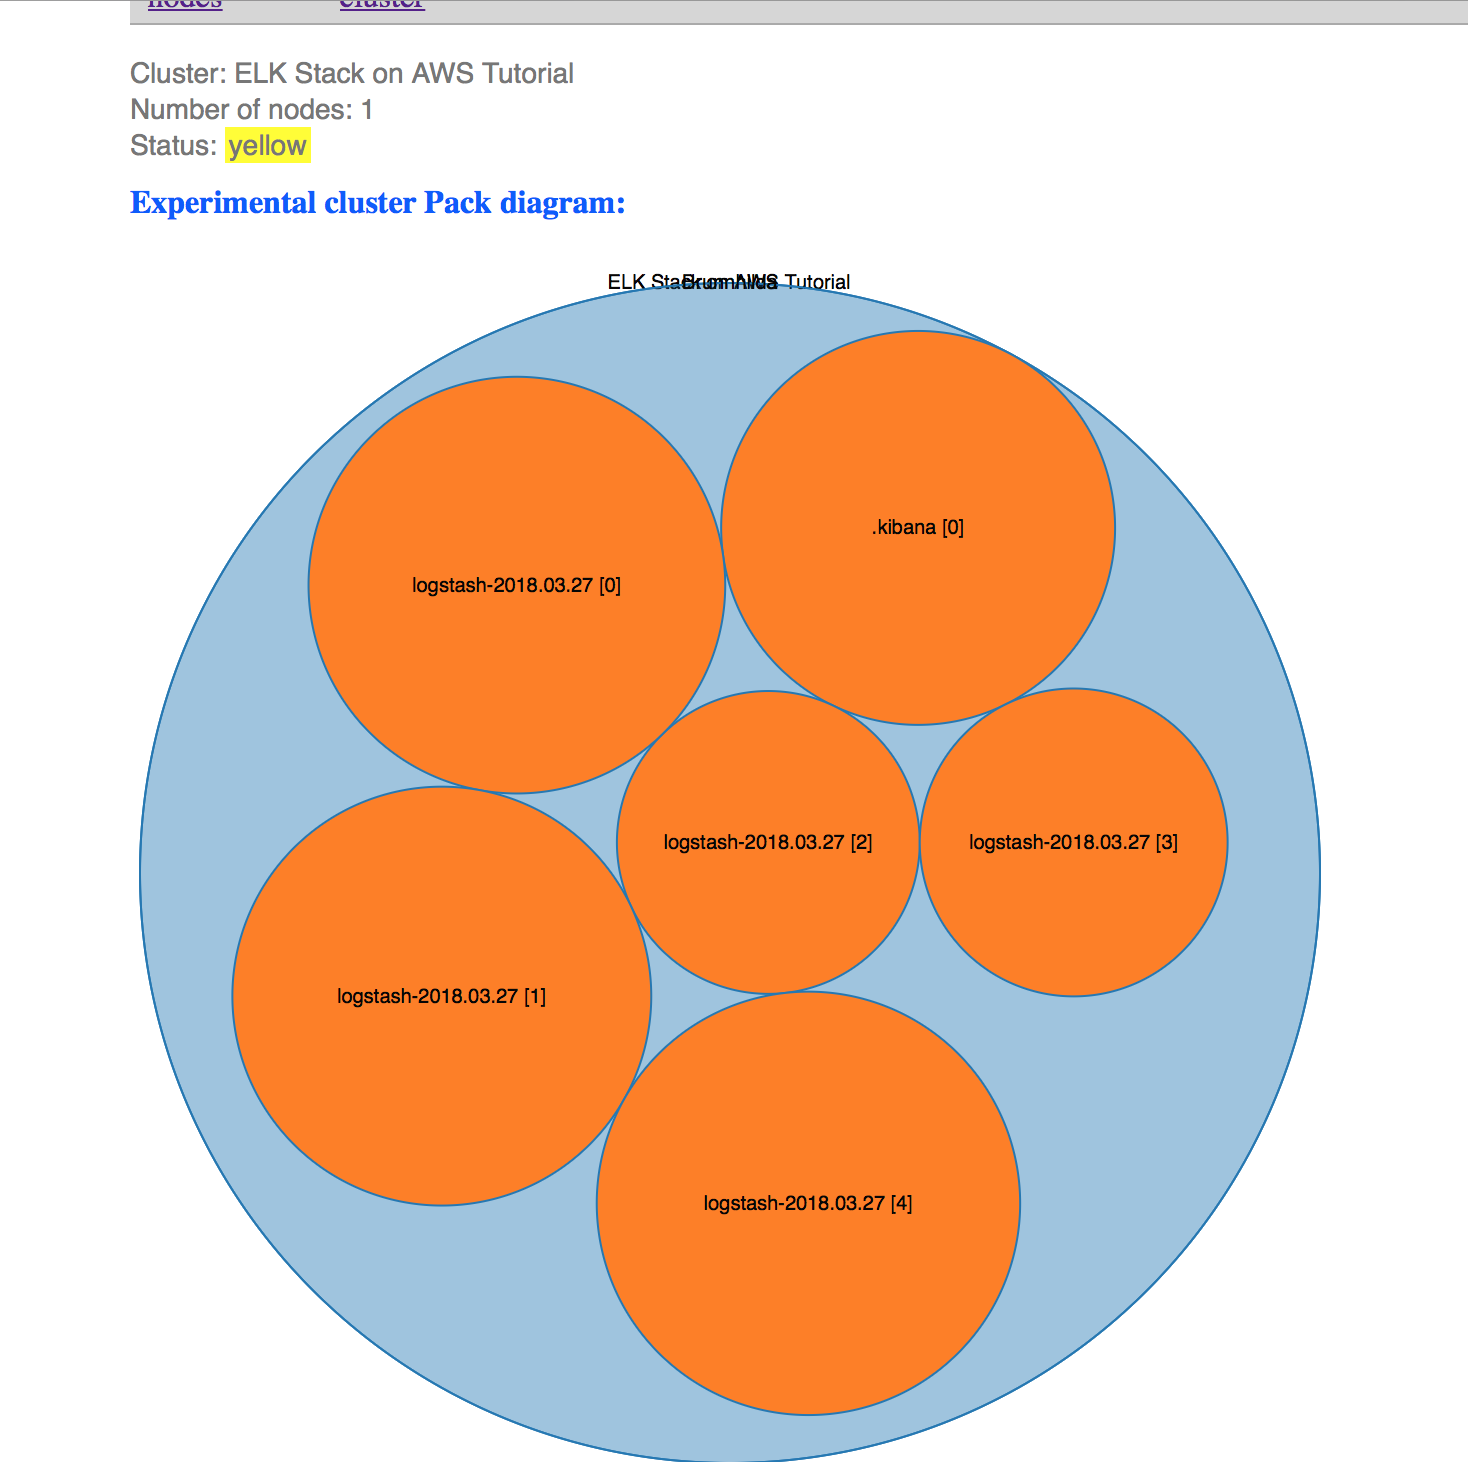

In [47]:
Image(filename="../Desktop/i20.png") 

This concludes the tutorial on the basic setup of AWS instances for the ELK stack and the working of all the three components together. Given below is an example of how to use the ELK stack to actually injest data and visualize it.

### Example of using the ELK Stack 

The datasets used here are[4]:
1. The complete works of William Shakespeare, suitably parsed into fields. 
2. A set of fictitious accounts with randomly generated data.
3. A set of randomly generated log files.

In [ ]:
#Schema of Skakesphere dataset
{
    "line_id": INT,
    "play_name": "String",
    "speech_number": INT,
    "line_number": "String",
    "speaker": "String",
    "text_entry": "String",
}

In [ ]:
#Schema of the accounts dataset:
{
    "account_number": INT,
    "balance": INT,
    "firstname": "String",
    "lastname": "String",
    "age": INT,
    "gender": "M or F",
    "address": "String",
    "employer": "String",
    "email": "String",
    "city": "String",
    "state": "String"
}

In [ ]:
#Schema of the logs dataset
{
    "memory": INT,
    "geo.coordinates": "geo_point"
    "@timestamp": "date"
}

In [ ]:
#Before we load the Shakespeare and logs data sets, we need to set up mappings for the fields. 
#Mapping divides the documents in the index into logical groups and specifies a field’s characteristics,...
#...such as the field’s searchability or whether or not it’s tokenized, or broken up into separate words.

#for shakespeare dataset
curl -XPUT 'elasticsearch_url:9200/shakespeare?pretty' -H 'Content-Type: application/json' -d'
{
 "mappings": {
  "doc": {
   "properties": {
    "speaker": {"type": "keyword"},
    "play_name": {"type": "keyword"},
    "line_id": {"type": "integer"},
    "speech_number": {"type": "integer"}
   }
  }
 }
}
'

In [ ]:
#for logs data
curl -XPUT 'elasticsearch_url:9200/logstash-2015.05.18?pretty' -H 'Content-Type: application/json' -d'
{
  "mappings": {
    "log": {
      "properties": {
        "geo": {
          "properties": {
            "coordinates": {
              "type": "geo_point"
            }
          }
        }
      }
    }
  }
}
'

In [ ]:
#The accounts data set doesn’t require any mappings, so at this point we’re ready to use the Elasticsearch bulk API to load the data sets with the following commands:

curl -H 'Content-Type: application/x-ndjson' -XPOST 'elasticsearch_url:9200/bank/account/_bulk?pretty' --data-binary @accounts.json
curl -H 'Content-Type: application/x-ndjson' -XPOST 'elasticsearch_url:9200/shakespeare/doc/_bulk?pretty' --data-binary @shakespeare_6.0.json
curl -H 'Content-Type: application/x-ndjson' -XPOST 'elasticsearch_url:9200/_bulk?pretty' --data-binary @logs.jsonl
#These commands may take some time to execute, depending on the computing resources available.

#Verify successful loading with the following command:
curl -XGET 'elasticsearch_url:9200/_cat/indices?v&pretty'


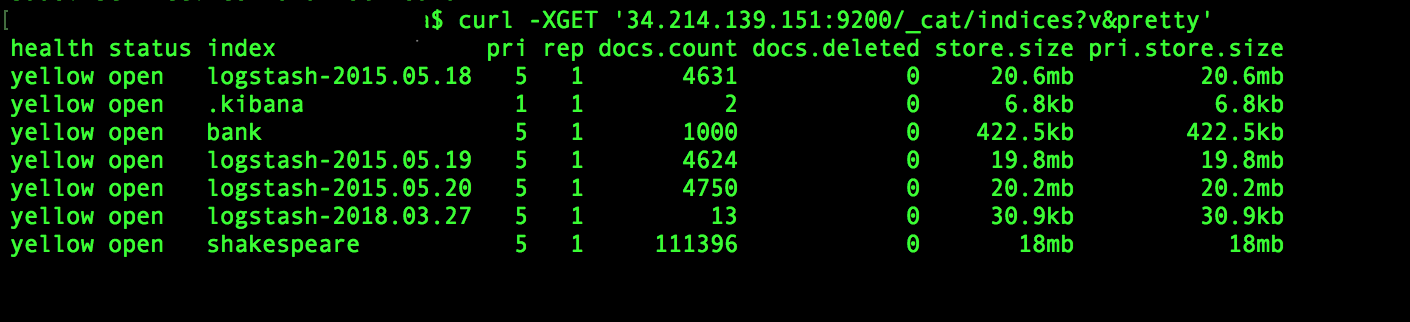

In [56]:
#The output should look something like this. 
#Health, if green its better because that just means that all the nodes are up and running. 
#Yellow means not all are running perfectly but will do for now.
Image(filename="../Desktop/last.png") 

Some of the visualization results from kibana on the accounts log data are shown below.

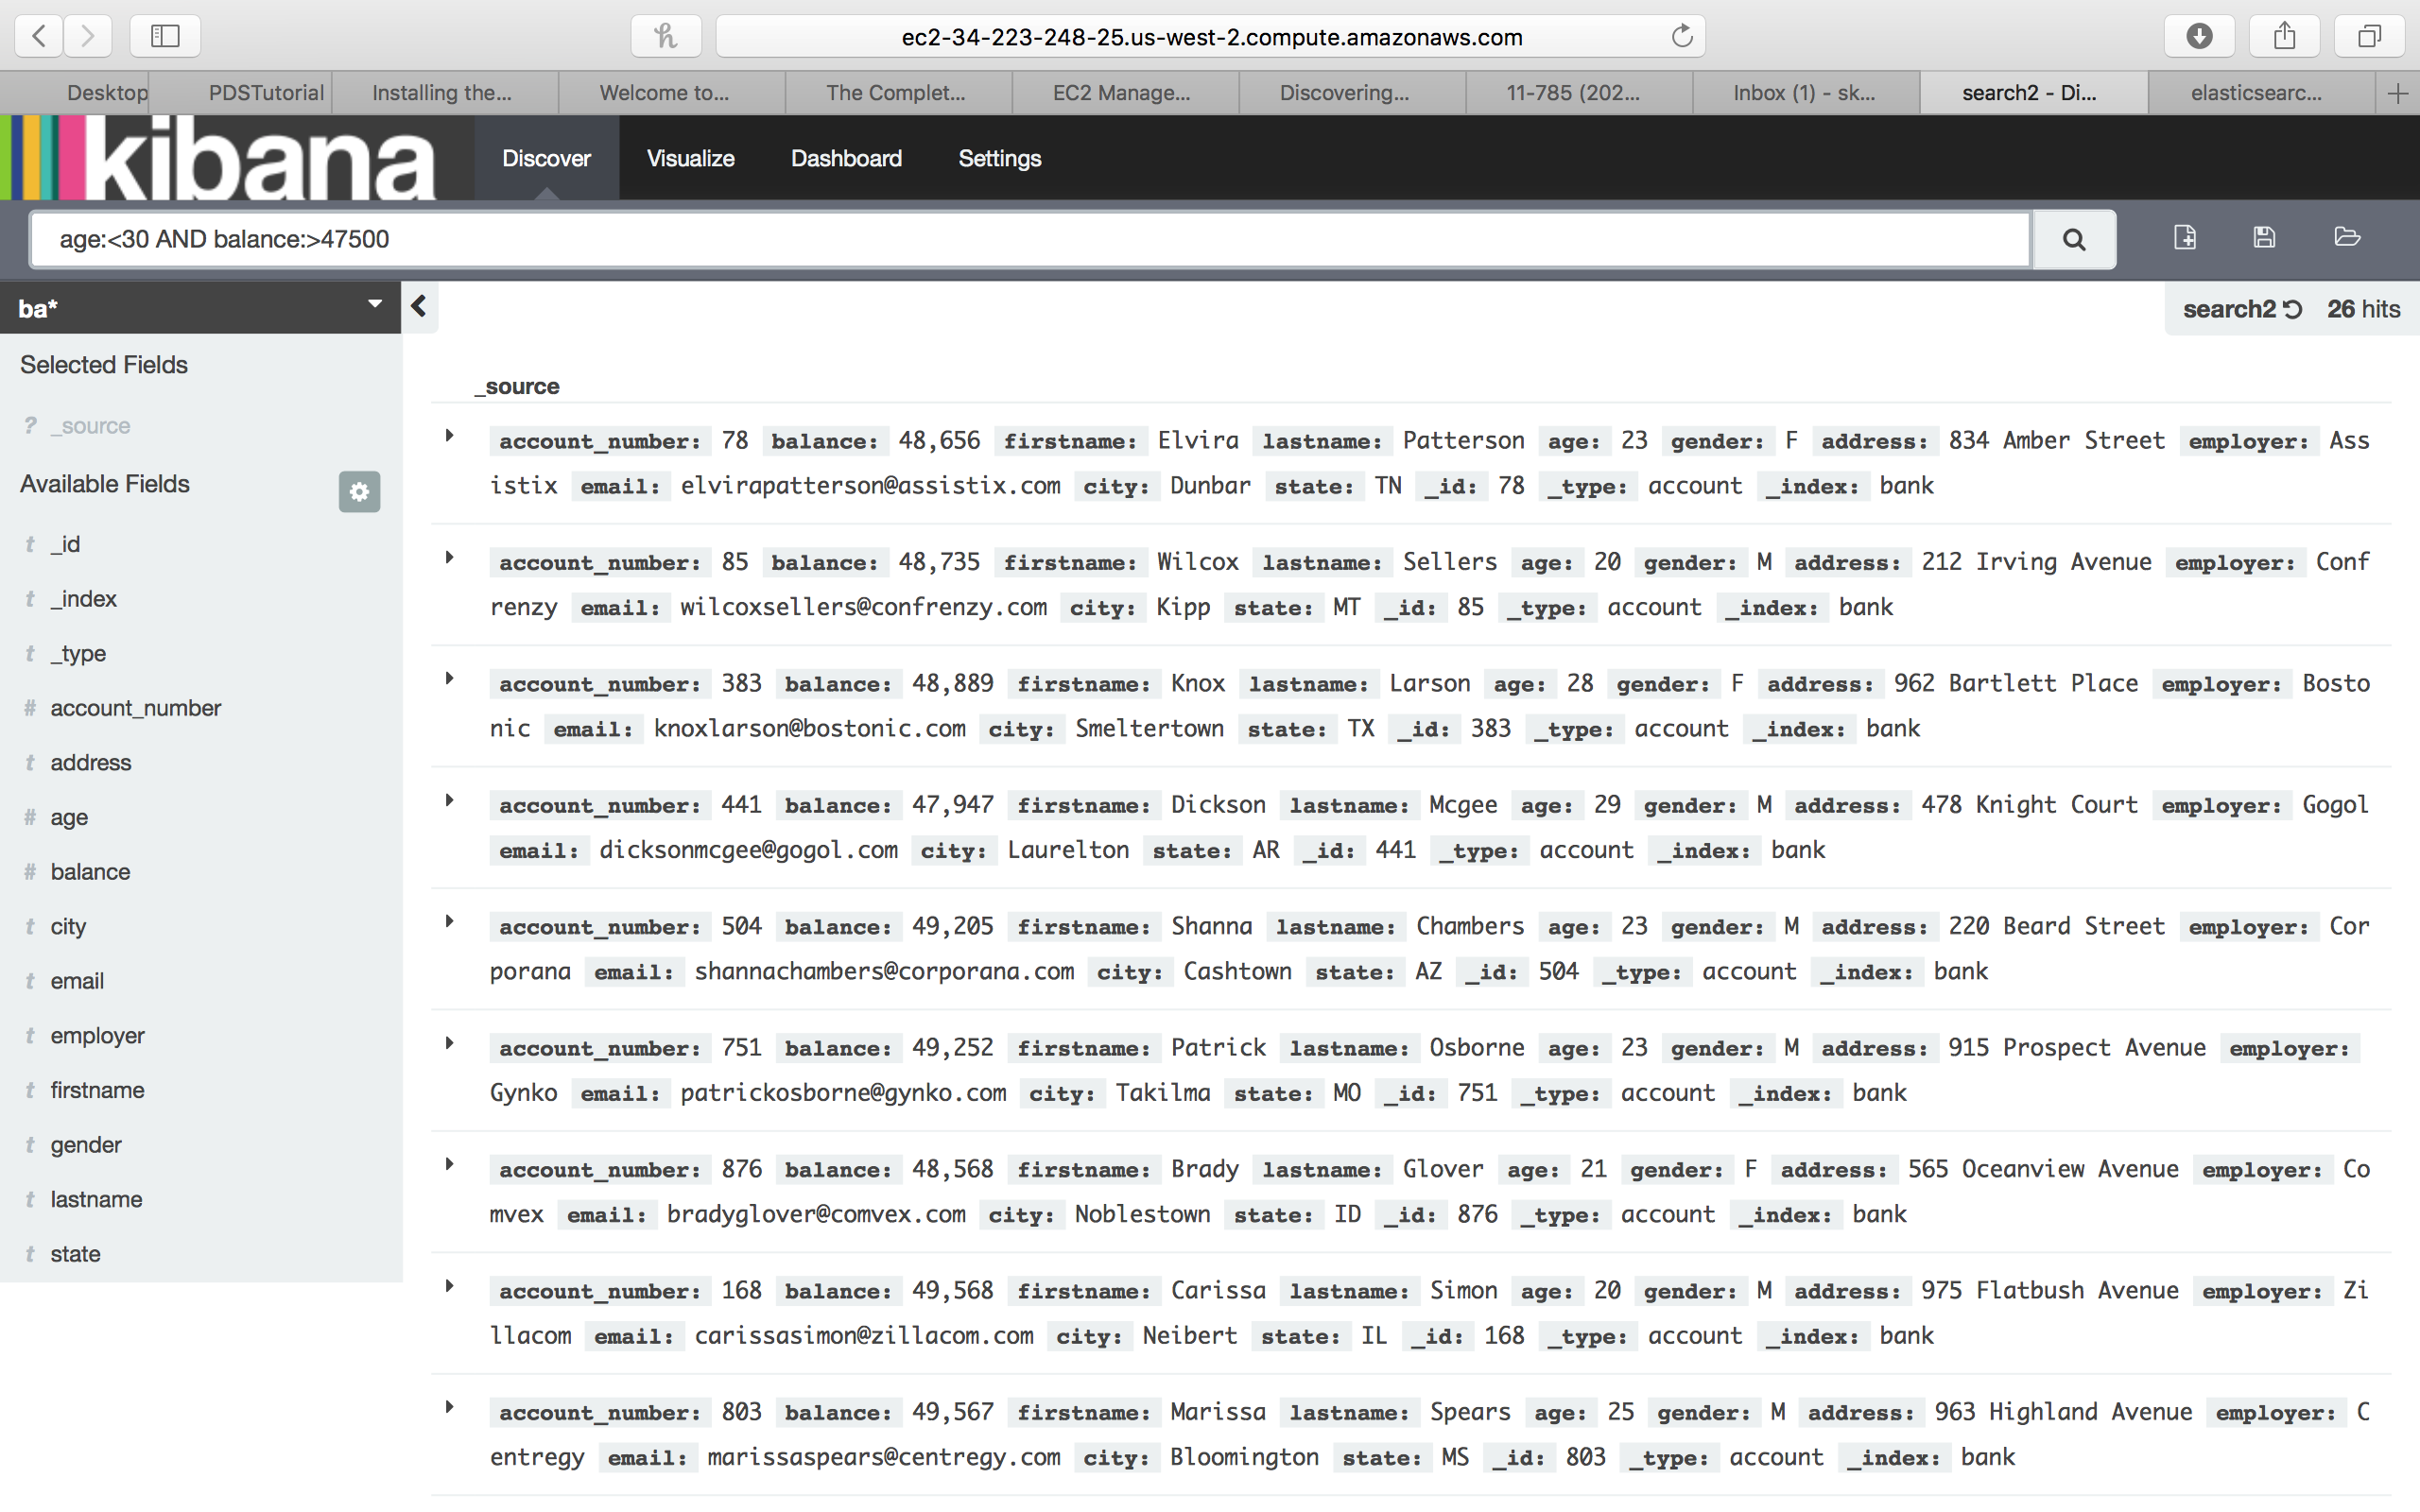

In [53]:
#Query on the data in elastic search which is visible in kibana. Results are visible in the 'Discover' tab.
#Here I've searched for people below the age of 30 who have an account balance of greater than 47500. 
Image(filename="../Desktop/i28.png") 

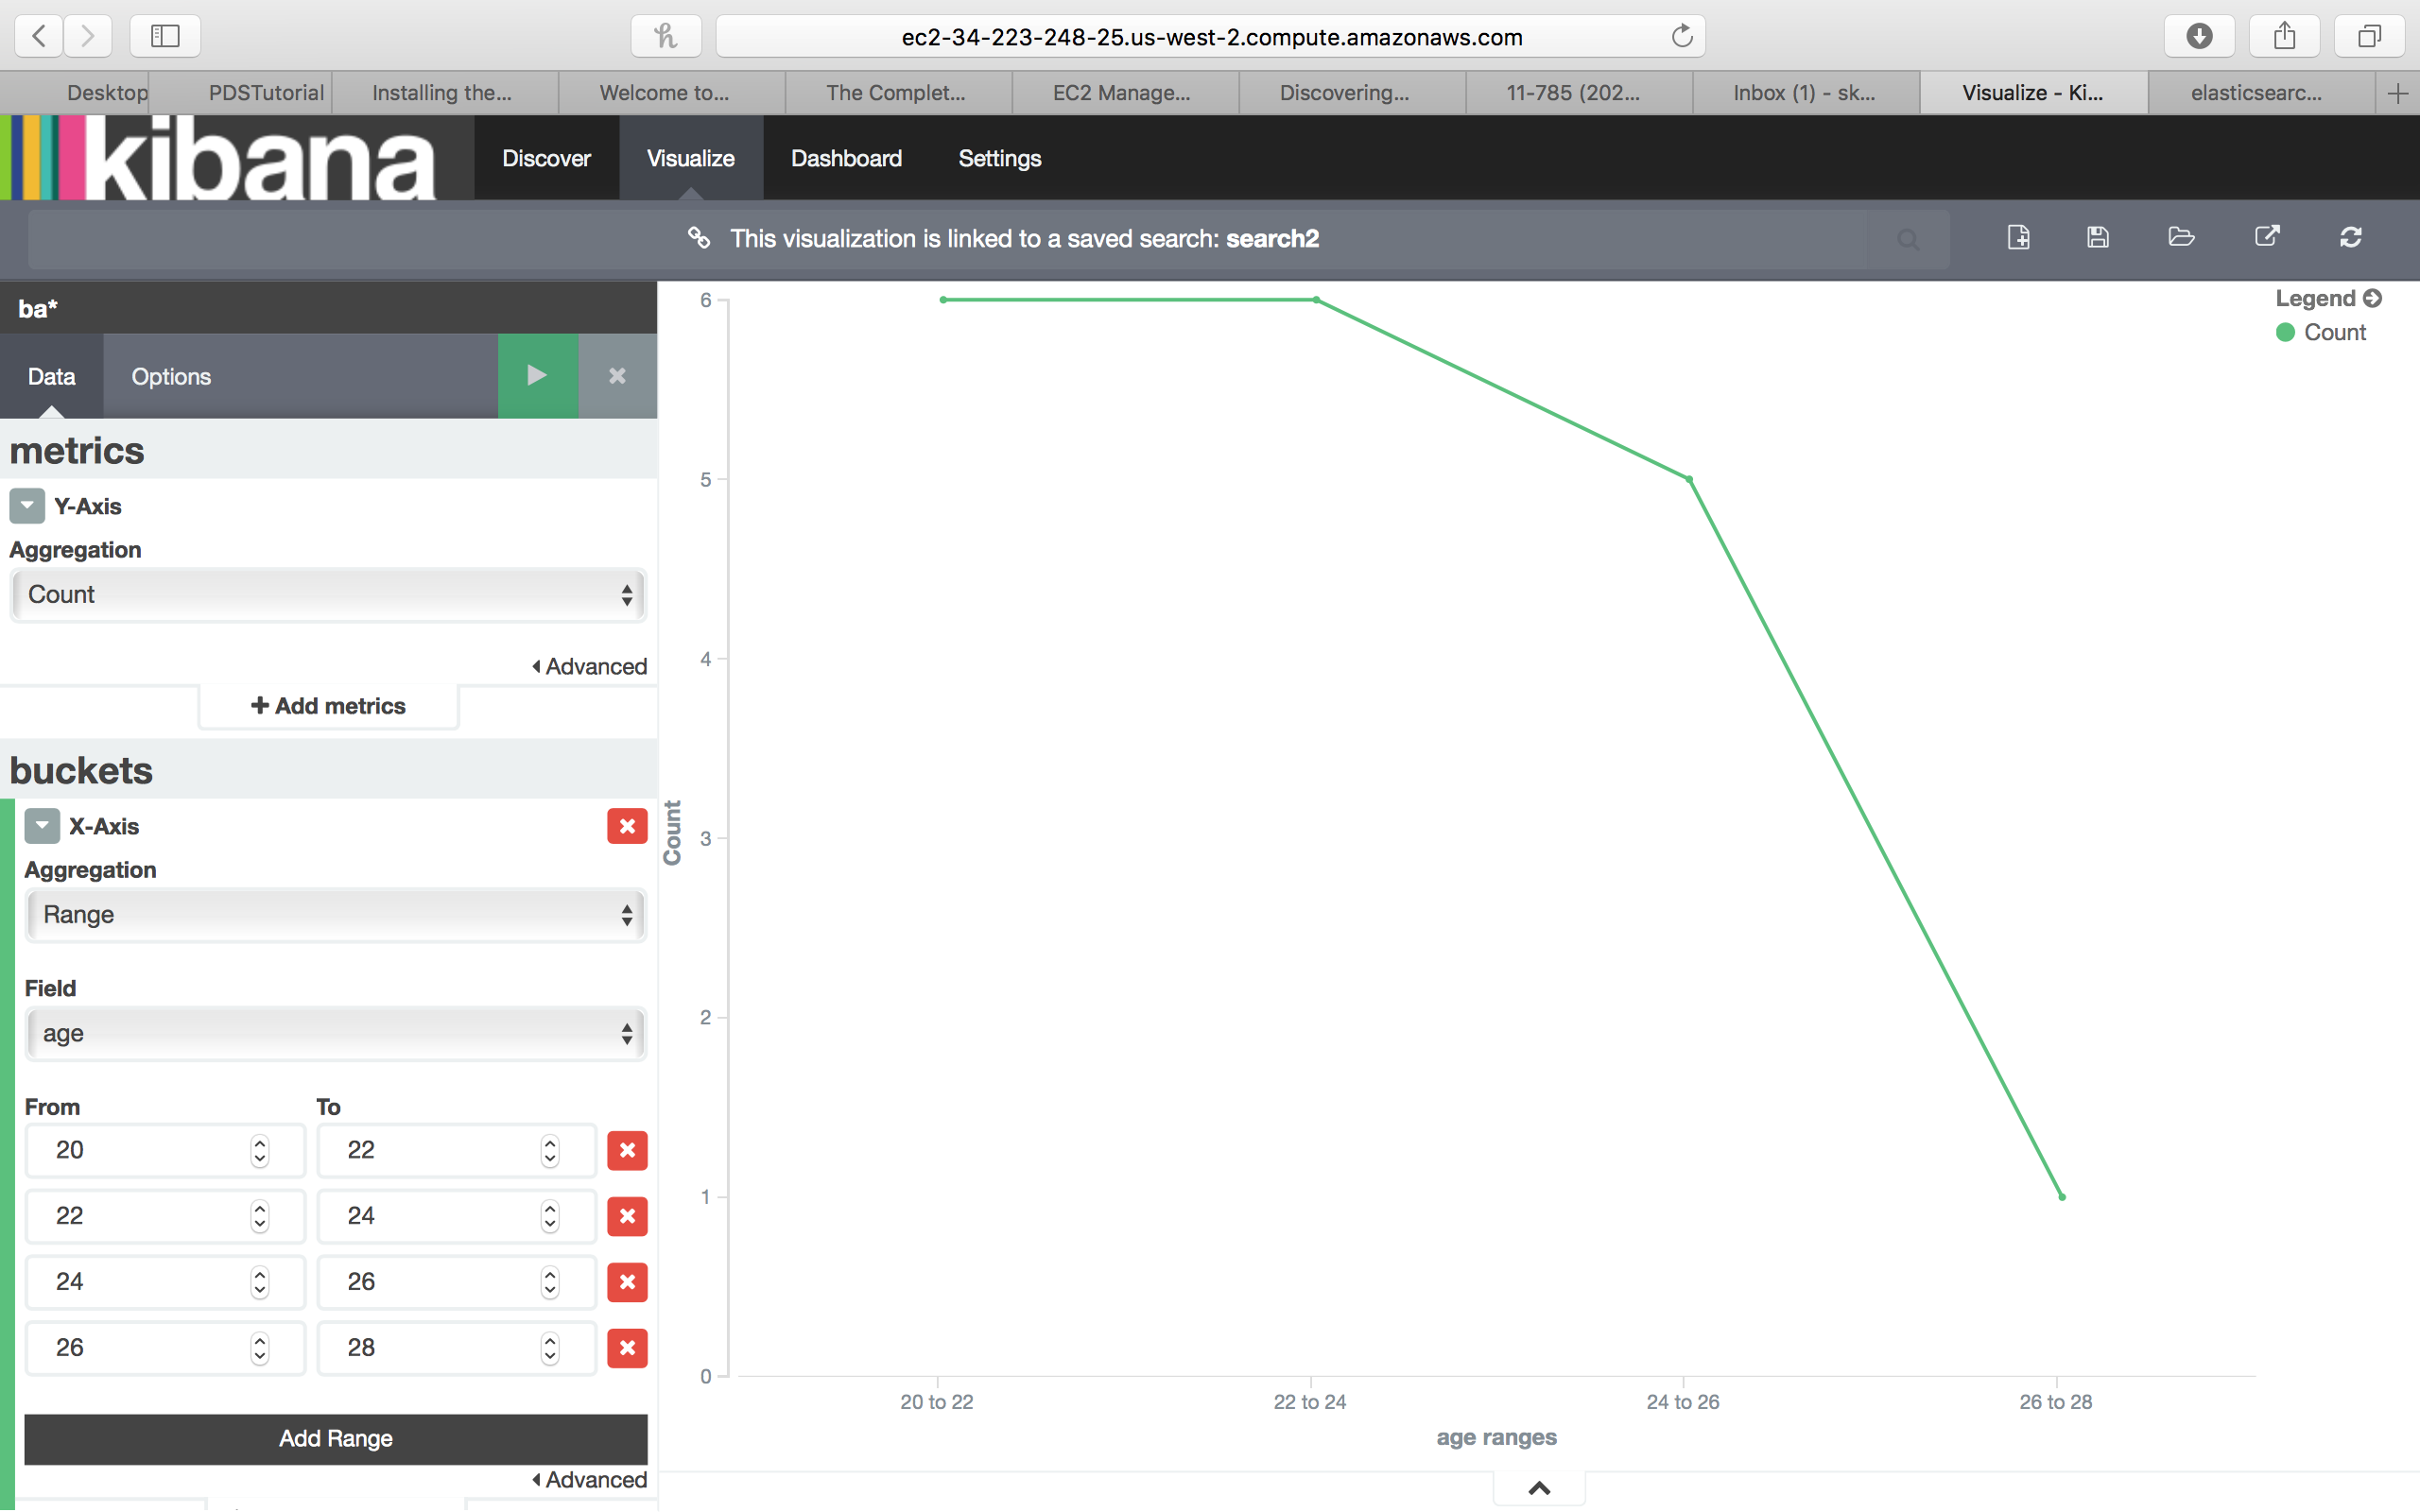

In [50]:
#'Visualize' the search (results of the 'Discover' tab) using an appropriate type of graph
Image(filename="../Desktop/i26.png") 

The results of this graph make sense to me. This is because people in the age group of 22 to 24 have just graduated from undergrad so might have starter level jobs whereas the ones older than 24 may have higher paying jobs as they would have been promoted by then. Another explanation could be that the ones in the age group of 26 to 28 might have spent the money in order to go to grad school so they might actually have lesser money in their accounts as compared to their younger counter parts.

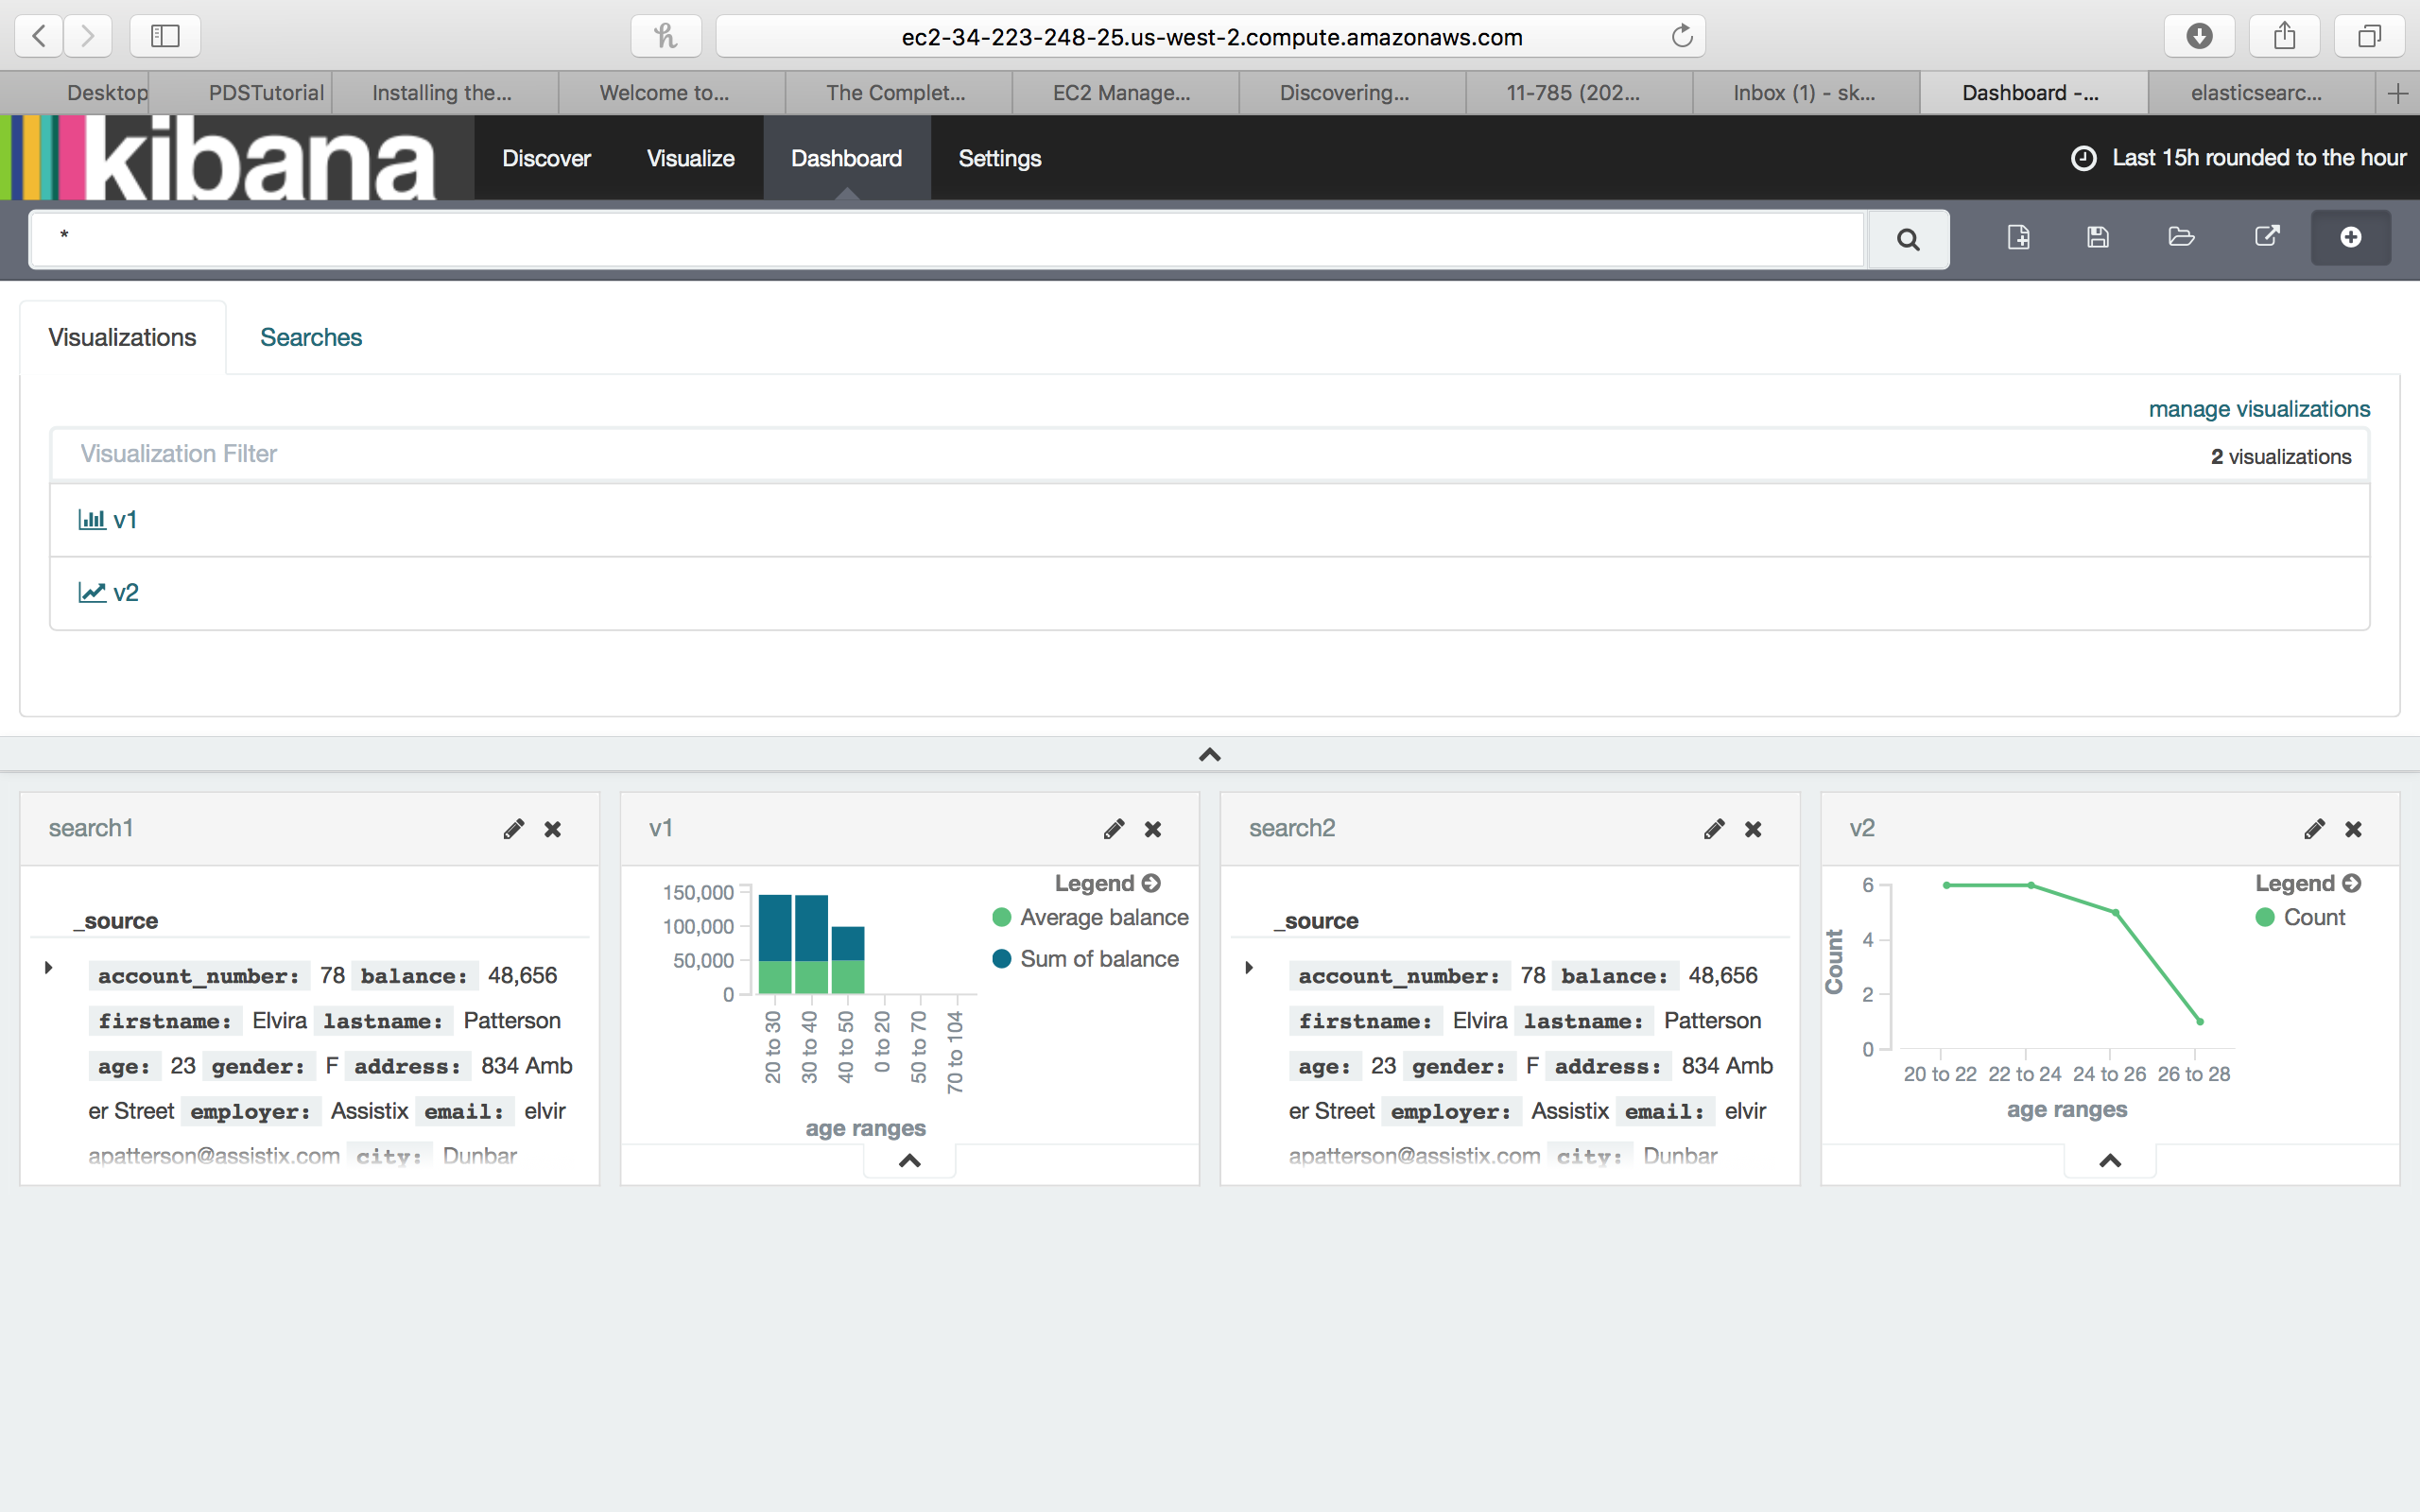

In [51]:
#Finally, view all your visualizations together on a 'Dashboard' for quick and convenient access.
Image(filename="../Desktop/i27.png") 

In this way we can even draw visualizations using Kibana for the shakespeare logs and the randomly generated log files. 

That's it for now. Hope the tutorial was fun and got you interested in the ELK Stack!

References
[1] https://logz.io/learn/complete-guide-elk-stack/
[2] https://qbox.io/blog/welcome-to-the-elk-stack-elasticsearch-logstash-kibana
[3] https://github.com/andrewpuch/elasticsearch-logstash-kibana-tutorial
[4] https://www.elastic.co/guide/en/kibana/current/tutorial-load-dataset.html
